# The Best Neighborhood To Play Frogger

![1984](img/pedestrian_walk_sign.jpg)
<br/>
<br/>

### **Walk.**

<br/>

### **Do not walk.**

<br/>


![1984](img/1984.gif)
<br/>
<br/>


Nothing is more oppressive than the pedestrian street light. It is time for us to riot against the tyranny of machine.

<br/>
<br/>

*"A man who runs fearlessly across the street is the mark of one truly free" - Jesus*

<br/>
<br/>

To train future revolutionaries, we have ranked the neighborhoods of Pittsburgh by difficulty. Just one mistake can mean game over, therefore, our criteria for determining difficulty must be incredibly precise. For the data, we have included: **Traffic speed & flow**, **crash history**, and **posted street signs**.

**The Metric:**

Now, we had some serious back and forth over just what our metric of greatness should be. All of our ideas were incredibly serious, professional, and if humor was present at all, it was incredibly high brow. So it should be no surprise that the idea we chose to investigate further is as serious as one can get: **Frogger**.

Let me explain. What is Pittsburgh a city of? It's a city of roads, of pedestrians, of public transportation that takes a tumble from time to time. Case in point:

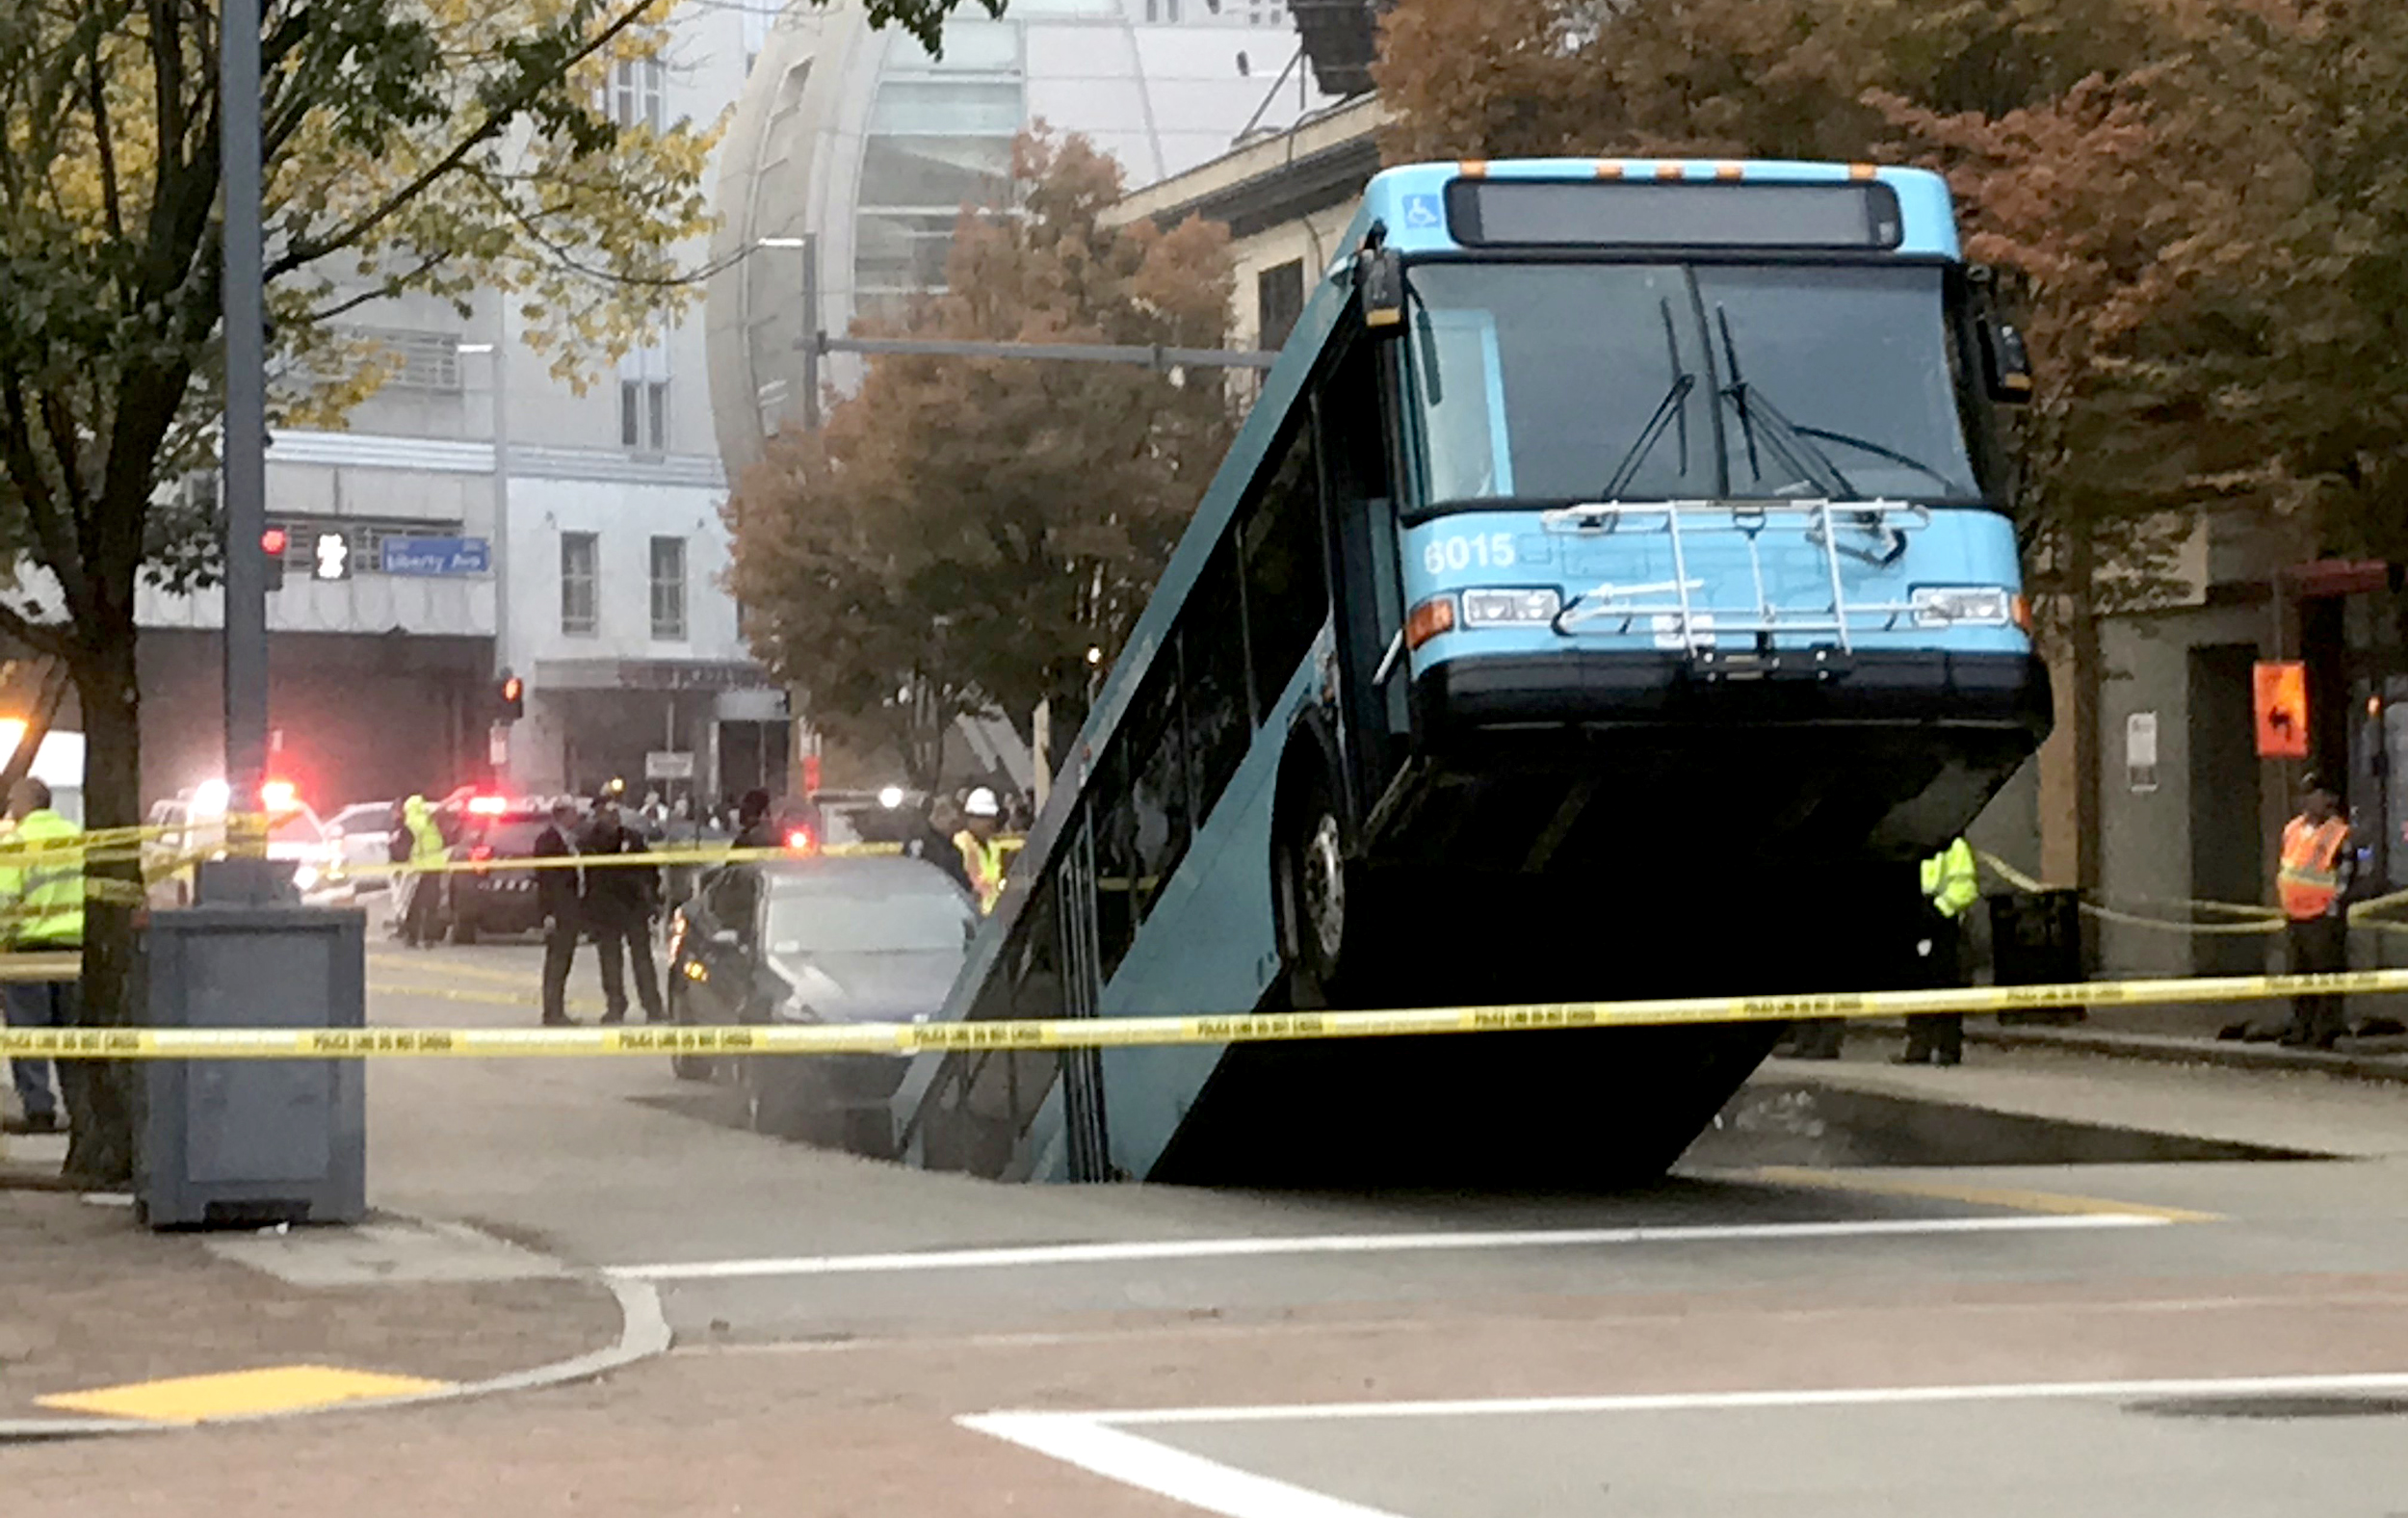

However, Pittsburgh is increasingly a city of tourism, if the ongoing and planned construction around the Rivers Casino is any indicator. And if tourists want anything, it's a chance to have fun, to live a little! And what better passtime could anyone ask for than **Real Life Frogger**?

For those among you that are a tad confused, the gameplay loop of **Real Life Frogger** consists of the following components:

* Find a road with a sidewalk on both ends
* Position yourself on one side of the road, at a point where there are no stop signs, yield signs, traffic lights, or crosswalks
* (Attempt to) Cross the road

Simple, rewarding, invigorating, and fun for the whole family.

So, if we want to decide the best neighborhood in the city in which to play **Real Life Frogger**, we have to consider what kind of experience the average player would desire, and the only correct answer there is the most exhilarating game possible. Therefore, the best neighborhood in the city in which to play **Real Life Frogger** is the neighborhood that is the most unsafe for pedestrians, specifically those that do not limit themselves to crosswalks and the whims of the little red hand in the yellow box on the stoplight pole. That means we're looking for the places where cars go fast, go over the speed limit, and crash often, and we're looking for neighborhoods with unsafe road conditions and little to no traffic signage, further decreasing the safety of the average pedestrian and increasing the fun potential of the average **Real Life Frogger** enjoyer.

Now, some housekeeping first:

# Traffic

In [42]:
import pandas as pd
import numpy as np

neighborhood_sqmile_dict = {'Allegheny Center': 0.21,
                                'Allegheny West': 0.14,
                                'Allentown': 0.30,
                                'Arlington': 0.49,
                                'Arlington Heights': 0.11,
                                'Banksville': 0.97,
                                'Bedford Dwellings': 0.18,
                                'Beechview': 1.46,
                                'Beltzhoover': 0.41,
                                'Bloomfield': 0.70,
                                'Bluff': 0.33,
                                'Bon Air': 0.32,
                                'Brighton Heights': 1.13,
                                'Brookline': 2.09,
                                'California-Kirkbride': 0.22,
                                'Carrick': 1.67,
                                'Central Business District': 0.65,
                                'Central Lawrenceville': 0.96,
                                'Central Northside': 0.26,
                                'Central Oakland': 0.28,
                                'Chartiers City': 0.13,
                                'Chateau': 0.38,
                                'Crafton Heights': 0.75,
                                'Crawford-Roberts': 0.26,
                                'Duquesne Heights': 0.62,
                                'East Allegheny': 0.24,
                                'East Carnegie': 0.43,
                                'East Hills': 0.54,
                                'East Liberty': 0.58,
                                'Elliot': 0.61,
                                'Esplen': 0.23,
                                'Fairywood': 0.97,
                                'Fineview':  0.25,
                                'Friendship': 0.11,
                                'Garfield': 0.46,
                                'Glen Hazel': 0.46,
                                'Greenfield': 0.78,
                                'Hays': 1.73,
                                'Hazelwood': 1.59,
                                'Highland Park': 1.12,
                                'Homewood North': 0.43,
                                'Homewood South': 0.39,
                                'Homewood West': 0.20,
                                'Knoxville': 0.30,
                                'Larimer': 0.45,
                                'Lincoln Place': 0.98,
                                'Lincoln‐Lemington‐Belmar': 1.78,
                                'Lower Lawrenceville': 0.43,
                                'Manchester': 0.28,
                                'Marshall‐Shadeland': 1.24,
                                'Middle Hill': 0.31,
                                'Morningside': 0.37,
                                'Mount Washington': 1.15,
                                'Mt. Oliver': 0.10,
                                'New Homestead': 0.79,
                                'North Oakland': 0.50,
                                'North Shore': 0.30,
                                'Northview Heights': 0.31,
                                'Oakwood': 0.25,
                                'Overbrook': 0.84,
                                'Perry North': 1.24,
                                'Perry South': 0.92,
                                'Point Breeze': 1.00,
                                'Point Breeze North': 0.29,
                                'Polish Hill': 0.25,
                                'Regent Square': 0.20,
                                'Ridgemont': 0.36,
                                'Shadyside': 0.92,
                                'Sheraden': 0.89,
                                'South Oakland': 0.51,
                                'South Shore': 0.22,
                                'Southside Flats': 0.91,
                                'Southside Slopes': 0.72,
                                'Spring Garden': 0.26,
                                'Spring Hill‐City View': 0.64,
                                'Squirrel Hill North': 1.22,
                                'Squirrel Hill South': 2.68,
                                'St. Clair': 0.31,
                                'Stanton Heights': 0.74,
                                'Strip District': 0.62,
                                'Summer Hill': 0.41,
                                'Swisshelm Park': 0.47,
                                'Terrace Village': 0.45,
                                'Troy Hill': 0.47,
                                'Upper Hill': 0.31,
                                'Upper Lawrenceville': 0.41,
                                'West End': 0.20,
                                'West Oakland': 0.11,
                                'Westwood': 0.69,
                                'Windgap': 0.42}

neighborhood_area_vals = neighborhood_sqmile_dict.values()
neighborhood_area_vals = list(neighborhood_area_vals)
neighborhood_area_keys = neighborhood_sqmile_dict.keys()
neighborhood_area_keys = list(neighborhood_area_keys)
neighborhood_area = pd.Series(neighborhood_sqmile_dict)

That's better. And don't worry about that dictionary for now, *it's a surprise tool that will help us later.* Now, time to look at some *Interesting Numbers*. We pulled data from a few different publicly-available datasets from WPRDC, and we'll introduce them as we look at them to keep things from getting too confusing. And according to the order I arbitrarily wrote a few paragraphs ago, the first sub-metric we're looking at is speed: where is there regularly a lot of cars, where do they go the fastest, and where do they go over the speed limit most often.

Here, we used a Average Car Traffic & Speed dataset (https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167), looking at which neighborhoods had the highest daily average car traffic, and the highest percentage of cars driving over the speed limit within the operation time of the recording devices used to gather data for this set. We also factored in the median speed of cars travelling in each neighborhood. First, some groundwork: 

In [43]:
need4speed = pd.read_csv("Car_Speed_Data.csv")
need4speed = need4speed.iloc[:, [5, 11, 12, 17]]
need4speed = need4speed.dropna()
need4speed

average_daily_car_traffic  median_speed  percent_over_limit  \
0                       4949.0          29.0                77.0   
3                       2741.0          28.0                70.0   
5                       1046.0          19.0                 2.0   
7                       3015.0          26.0                58.0   
10                      5592.0          28.0                70.0   
..                         ...           ...                 ...   
402                     5605.0          29.0                77.0   
404                      809.0          17.0                 2.0   
410                      910.0          23.0                29.0   
411                      271.0          20.0                10.0   
412                     3454.0          23.0                31.0   

              neighborhood  
0              Polish Hill  
3      Squirrel Hill South  
5        Central Northside  
7              Polish Hill  
10     Squirrel Hill South  
..                     ...  
402             Greenfield  
404      Central Northside  
410             Bloomfield  
411             Bloomfield  
412  Central Lawrenceville  

[221 rows x 4 columns]

We set need4speed as the callable name for the relevant dataset, select only the relevant columns (trust me, a lot of them meant absolutely nothing), and drop any rows with missing data only within our selected columns. Turns out we had a lot of missing data, considering we lost nearly 200 entries, but we still have enough to work with. First, let's look at traffic counts.

Regent Square                16729.000000
Crafton Heights              11500.000000
North Shore                  10350.000000
Strip District                9691.666667
East Hills                    8126.500000
Westwood                      7700.000000
Brookline                     6204.666667
North Oakland                 6064.500000
California-Kirkbride          5843.000000
Duquesne Heights              5831.000000
Mount Washington              5637.250000
Point Breeze North            4964.000000
Point Breeze                  4877.666667
East Liberty                  4693.250000
Friendship                    4448.000000
Shadyside                     4238.500000
Stanton Heights               4085.333333
South Side Slopes             3778.142857
Central Oakland               3768.666667
Homewood South                3734.750000
Carrick                       3732.666667
Larimer                       3545.444444
Homewood North                3513.500000
Elliott                       3427

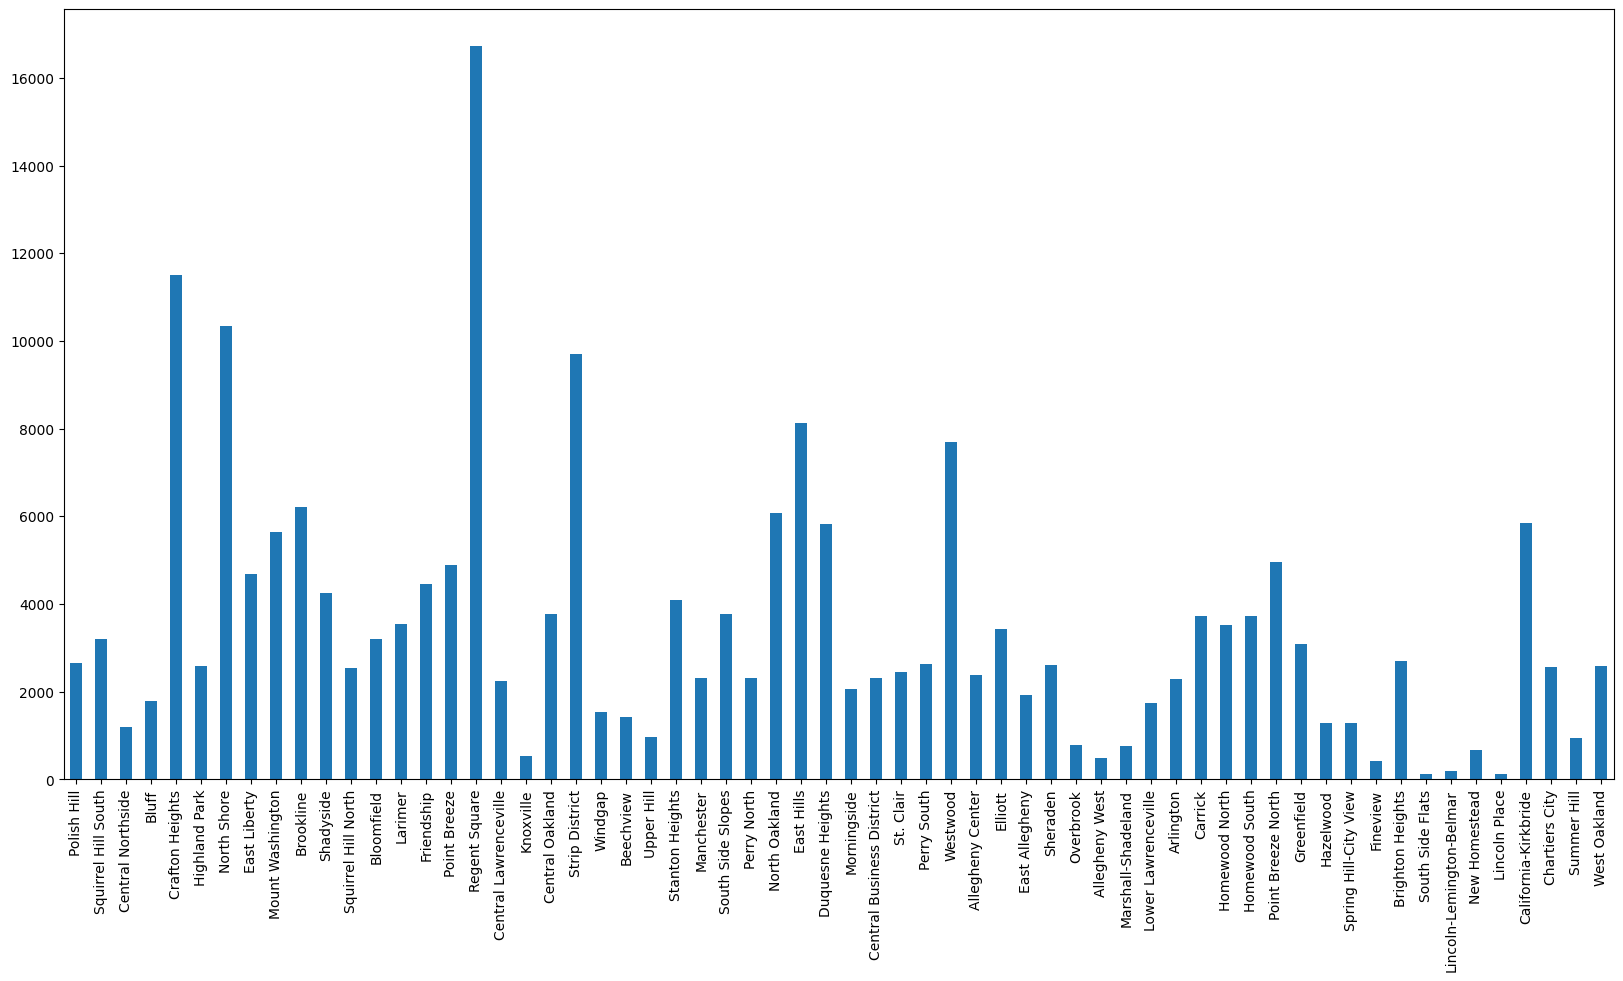

In [44]:
need4Traffic = need4speed.iloc[:, [0, 3]]
hoodTraffic = dict()
hoodCounts = dict()
hoodList = list()
masterAvgs = list()
hoodTrafficMasterAvgs = dict()
for index, row in need4Traffic.iterrows():
    neighborhood = row['neighborhood']
    avg_daily_traffic = row['average_daily_car_traffic']
    if neighborhood not in hoodTraffic:
        hoodTraffic[neighborhood] = avg_daily_traffic
        hoodCounts[neighborhood] = 1
        hoodList.append(neighborhood)
      
    else:
        hoodTraffic[neighborhood] += avg_daily_traffic
        hoodCounts[neighborhood] += 1
        
hoodTrafficVals = hoodTraffic.values()
hoodTrafficVals = list(hoodTrafficVals)
hoodCountsVals = hoodCounts.values()
hoodCountsVals = list(hoodCountsVals)
for total in hoodTrafficVals:
    loc = int(hoodTrafficVals.index(total))
    activeCount = hoodCountsVals[loc]
    masterAvg = total / activeCount
    masterAvgs.append(masterAvg)
    
trafficdf = pd.Series(masterAvgs, index=hoodList)
trafficdf.plot(kind="bar", figsize=(20,10))
trafficdf.sort_values(ascending=False).head(50)

There's a lot going on there, so some explanation is in order. First, a disclaimer. I, Aidan Brophy, am more comfortable working with the default Python data manipulation tools than Pandas *at the moment*. Therefore, most of the work in this section and the traffic signage section will revolve around lists and dictionaries, as well as abusing the hell out of them. Moving on, the data set describes traffic in terms of daily averages over a set period of time during which data was being collected, so to get some accurate traffic data for each neighborhood, we had to add all of the daily average values up for each neighborhood and divide that total by the amount of times that neighborhood appeared in our corrected dataset, therefore creating a master average of a daily average. Then, after some casual dictionary abuse to make sure that the master daily traffic averages are assigned to the correct neighborhoods by order of appearence in the dataset, we end up with A) A bar graph of average daily traffic in each neighborhood, and B) the top 50 neighborhoods, out of the 97 in Pittsburgh, by average daily traffic. That second bit is how we'll award points in both of my sections. The neighborhood at the top of the list gets 50 points towards its **Real Life Frogger** score, descending through the list until we hit 50th, which gets a pity point. Let's do the exact same for median speed:

Crafton Heights         37.000000
Westwood                36.500000
Elliott                 35.000000
East Hills              32.500000
Point Breeze North      31.000000
North Oakland           31.000000
Stanton Heights         30.333333
St. Clair               30.000000
Regent Square           30.000000
North Shore             29.000000
Brighton Heights        29.000000
Mount Washington        28.875000
Perry North             28.857143
Hazelwood               28.500000
Strip District          28.000000
California-Kirkbride    28.000000
Friendship              28.000000
Point Breeze            28.000000
Chartiers City          28.000000
East Liberty            27.875000
Homewood South          27.750000
Greenfield              27.500000
Brookline               27.333333
Windgap                 27.000000
Allegheny Center        27.000000
South Side Slopes       26.857143
Carrick                 26.666667
Beechview               26.666667
Sheraden                26.500000
Arlington     

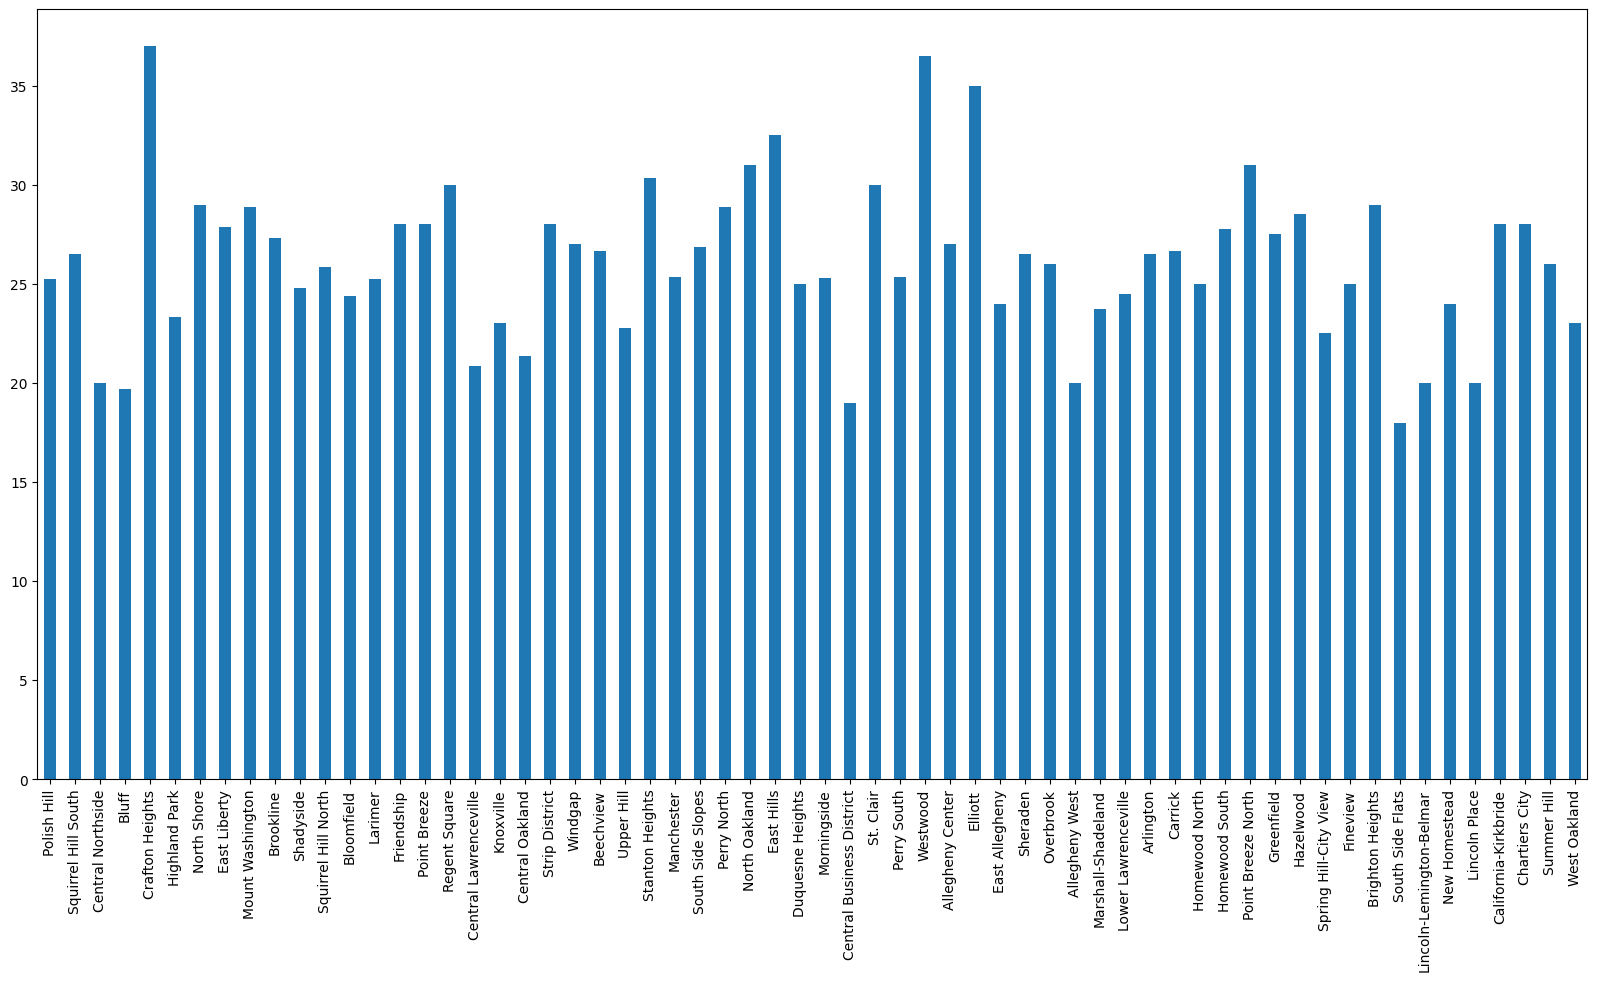

In [45]:
med4speed = need4speed.iloc[:, [1, 3]]
hoodSpeed = dict()
hoodCounts = dict()
hoodList = list()
masterAvgs = list()
hoodSpeedMasterAvgs = dict()
for index, row in med4speed.iterrows():
    neighborhood = row['neighborhood']
    medianSpeed = row['median_speed']
    if neighborhood not in hoodSpeed:
        hoodSpeed[neighborhood] = medianSpeed
        hoodCounts[neighborhood] = 1
        hoodList.append(neighborhood)
      
    else:
        hoodSpeed[neighborhood] += medianSpeed
        hoodCounts[neighborhood] += 1
        
hoodSpeedVals = hoodSpeed.values()
hoodSpeedVals = list(hoodSpeedVals)
hoodCountsVals = hoodCounts.values()
hoodCountsVals = list(hoodCountsVals)
for total in hoodSpeedVals:
    loc = int(hoodSpeedVals.index(total))
    activeCount = hoodCountsVals[loc]
    masterAvg = total / activeCount
    masterAvgs.append(masterAvg)
    
speeddf = pd.Series(masterAvgs, index=hoodList)
speeddf.plot(kind="bar", figsize=(20,10))
speeddf.sort_values(ascending=False).head(50)

...and average percentage of cars travelling over the speed limit:

Crafton Heights          98.000000
Elliott                  97.000000
Point Breeze North       88.000000
Regent Square            86.000000
Lower Lawrenceville      85.000000
St. Clair                85.000000
Brighton Heights         82.000000
Stanton Heights          81.333333
East Hills               79.500000
North Shore              78.000000
Chartiers City           78.000000
Mount Washington         75.250000
Hazelwood                71.500000
Friendship               68.000000
East Liberty             65.625000
Greenfield               65.500000
Allegheny Center         65.000000
Point Breeze             64.500000
Homewood South           64.000000
Sheraden                 61.500000
Arlington                61.500000
Brookline                61.166667
Strip District           60.333333
Westwood                 59.500000
South Side Slopes        59.428571
Beechview                59.000000
North Oakland            58.500000
Overbrook                58.000000
Perry North         

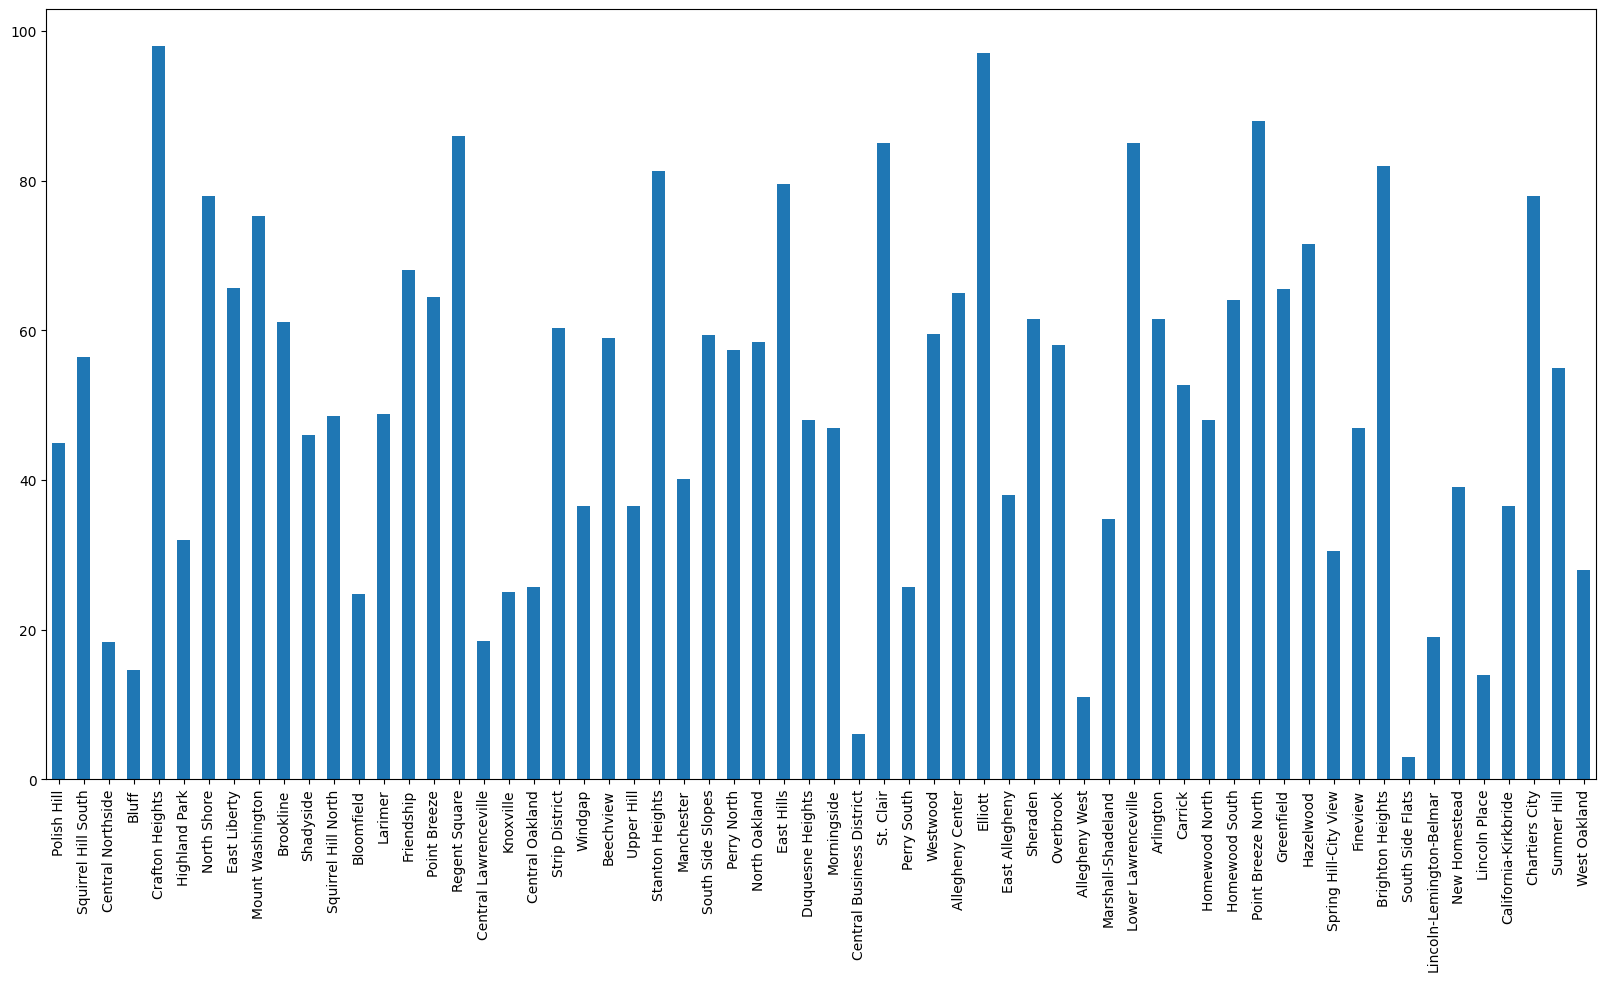

In [46]:
need4speeding = need4speed.iloc[:, [2, 3]]
hoodSpeeding = dict()
hoodCounts = dict()
hoodList = list()
masterAvgs = list()
hoodSpeedingMasterAvgs = dict()
for index, row in need4speeding.iterrows():
    neighborhood = row['neighborhood']
    percentSpeeding = row['percent_over_limit']
    if neighborhood not in hoodSpeeding:
        hoodSpeeding[neighborhood] = percentSpeeding
        hoodCounts[neighborhood] = 1
        hoodList.append(neighborhood)
      
    else:
        hoodSpeeding[neighborhood] += percentSpeeding
        hoodCounts[neighborhood] += 1
        
hoodSpeedingVals = hoodSpeeding.values()
hoodSpeedingVals = list(hoodSpeedingVals)
hoodCountsVals = hoodCounts.values()
hoodCountsVals = list(hoodCountsVals)
for total in hoodSpeedingVals:
    loc = int(hoodSpeedingVals.index(total))
    activeCount = hoodCountsVals[loc]
    masterAvg = total / activeCount
    masterAvgs.append(masterAvg)
    
speeddf = pd.Series(masterAvgs, index=hoodList)
speeddf.plot(kind="bar", figsize=(20,10))
speeddf.sort_values(ascending=False).head(50)

Guess people really like leaving/not being in Crafton Heights. Anyways, all of that data gives us the following **Real Life Frogger** scores:

* Crafton Heights: 149
* Regent Square: 139
* East Hills: 135
* Point Breeze North: 133
* North Shore: 130
* Elliot: 124
* Stanton Heights: 121
* Westwood: 121
* Mount Washington: 118
* North Oakland: 112
* Strip District: 111
* Brighton Heights: 107
* Friendship: 107
* East Liberty: 104
* Point Breeze: 104
* St. Clair: 103
* Brookline: 101
* Homewood South: 93
* Chartiers City: 89
* Greenfield: 88
* California-Kirkbride: 84
* Allegheny Center: 74
* Hazelwood: 76
* Carrick: 73
* Perry North: 73
* Sheraden: 73
* Duquesne Heights: 67
* Squirrel Hill South: 67
* Larimer: 60
* Homewood North: 54
* Shadyside: 54
* Arlington: 51
* Beechview: 51
* Squirrel Hill North: 50
* Lower Lawrenceville: 46
* Polish Hill: 45
* Overbrook: 41
* Summer Hill: 39
* Perry South: 37
* Windgap: 36
* Morningside: 35
* Central Oakland: 32
* Bloomfield: 31
* Highland Park: 24
* Fineview: 23
* East Allegheny: 19
* West Oakland: 19
* New Homestead: 14
* Central Business District: 12
* Manchester: 10
* Central Lawrenceville: 9
* Bluff: 6
* Upper Hill: 6
* Knoxville: 1

And let's put all of that into a dictionary for ease-of-use.

In [47]:
traffic_speed_final_scores = {'Crafton Heights': 149,
'Regent Square': 139,
'East Hills': 135,
'Point Breeze North': 133,
'North Shore': 130,
'Elliot': 124,
'Stanton Heights': 121,
'Westwood': 121,
'Mount Washington': 118,
'North Oakland': 112,
'Strip District': 111,
'Brighton Heights': 107,
'Friendship': 107,
'East Liberty': 104,
'Point Breeze': 104,
'St. Clair': 103,
'Brookline': 101,
'Homewood South': 93,
'Chartiers City': 89,
'Greenfield': 88,
'California-Kirkbride': 84,
'Allegheny Center': 74,
'Hazelwood': 76,
'Carrick': 73,
'Perry North': 73,
'Sheraden': 73,
'Duquesne Heights': 67,
'Squirrel Hill South': 67,
'Larimer': 60,
'Homewood North': 54,
'Shadyside': 54,
'Arlington': 51,
'Beechview': 51,
'Squirrel Hill North': 50,
'Lower Lawrenceville': 46,
'Polish Hill': 45,
'Overbrook': 41,
'Summer Hill': 39,
'Perry South': 37,
'Windgap': 36,
'Morningside': 35,
'Central Oakland': 32,
'Bloomfield': 31,
'Highland Park': 24,
'Fineview': 23,
'East Allegheny': 19,
'West Oakland': 19,
'New Homestead': 14,
'Central Business District': 12,
'Manchester': 10,
'Central Lawrenceville': 9,
'Bluff': 6,
'Upper Hill': 6,
'Knoxville': 1}
part_1_scores = pd.Series(traffic_speed_final_scores)
#part_1_scores= pd.merge(part_1_scores, neighborhood_area, how='outer', on='x1')
part_1_scores_corrected_dict = {'Part 1 Scores': part_1_scores, 'Square Miles': neighborhood_area}
part_1_scores_corrected = pd.DataFrame(part_1_scores_corrected_dict)
part_1_scores_corrected = part_1_scores_corrected.iloc[:, [0]]
part_1_scores_corrected = part_1_scores_corrected.fillna(0)
part_1_scores_corrected

Part 1 Scores
Allegheny Center              74.0
Allegheny West                 0.0
Allentown                      0.0
Arlington                     51.0
Arlington Heights              0.0
...                            ...
Upper Lawrenceville            0.0
West End                       0.0
West Oakland                  19.0
Westwood                     121.0
Windgap                       36.0

[90 rows x 1 columns]

# Crashes
![Cars](img/crash.gif)

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point

This dataset is a little ugly and bloated, so first we must cut out any unnecessary columns before our analysis. 

First, we read in all the columns we care about and cut out any crashes that lack GPS coordinates. Because this dataset is missing neighborhood information, we need to use the provided latitude and longitude to determine which neighborhood the crash occurred in. This is done using the neighborhoods shape file and we check each neighborhood to determine whether the gps point is within a neighborhood's boundaries. 

We then drop any crashes that occur between neighborhoods (these are usually crashes on bridges). This reduces our dataset from 216,000 entries to 70,000. The output is saved as a new .csv because this process takes 30+ minutes to complete. You may thank me later.

In [ ]:
# DO NOT RUN: output is already saved as Crash_Data_Neighborhood.csv

crashes = pd.read_csv('Crash_Data.csv', usecols = ["DEC_LAT","DEC_LONG","DRINKING_DRIVER","CELL_PHONE","RUNNING_RED_LT","AGGRESSIVE_DRIVING","DISTRACTED","DRUGGED_DRIVER","ILLEGAL_DRUG_RELATED","RUNNING_STOP_SIGN"])
crashes = crashes.dropna(subset=["DEC_LAT","DEC_LONG"])

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods.shp")

def get_neighborhood(lat, long):
    crash_loc = Point(map(float, (long, lat)))
    # Loop through each of the 90 neighborhoods and check if the coordinate is within its bounds
    for i, neighborhood in neighborhoods.iterrows():
        if neighborhood["geometry"].contains(crash_loc):
            return neighborhood["hood"]
    return None

crashes["NEIGHBORHOOD"] = crashes.apply(lambda row: get_neighborhood(row.DEC_LAT, row.DEC_LONG), axis=1)
crashes = crashes.dropna(subset=["NEIGHBORHOOD"]) # remove any crashes outside of the neighborhoods
crashes.to_csv(path_or_buf = "Crash_Data_Neighborhood.csv")

## Driver Personality Analysis
From the crash data available, we can split Pittsburgh drivers into two categories, psychopaths, and the impaired.

![Driver compass](img/driver_compass.png)

In [50]:
crashes = pd.read_csv('Crash_Data_Neighborhood.csv')
crashes = crashes.dropna()

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods.shp")

# Separate data into sub-metrics
impaired = crashes[["DRINKING_DRIVER","DRUGGED_DRIVER","ILLEGAL_DRUG_RELATED","CELL_PHONE","DISTRACTED"]]
psychopath = crashes[["RUNNING_RED_LT","RUNNING_STOP_SIGN","AGGRESSIVE_DRIVING"]]

# Drop sub-metrics from main dataset
crashes = crashes[["NEIGHBORHOOD"]]

Now we split the crash metrics into impairedness and psychopathic scores. Especially egregious behaviors are rewardeed more points which are then combined into a driver danger score.

In [51]:
# Max Score: 8
crashes["IMPAIRED_SCORE"] = impaired.apply(lambda row: row.DISTRACTED + row.DRUGGED_DRIVER + 2*row.CELL_PHONE + 2*row.DRINKING_DRIVER + 2*row.ILLEGAL_DRUG_RELATED, axis=1)

# Max Score: 6
crashes["PSYCHOPATH_SCORE"] = psychopath.apply(lambda row: 2*row.RUNNING_RED_LT + 2*row.RUNNING_STOP_SIGN + 2*row.AGGRESSIVE_DRIVING, axis=1)

# Max Score: 14
crashes["DANGER_SCORE"] = crashes.apply(lambda row: row.IMPAIRED_SCORE + row.PSYCHOPATH_SCORE, axis=1)

crashes.sample(5)

NEIGHBORHOOD  IMPAIRED_SCORE  PSYCHOPATH_SCORE  DANGER_SCORE
67396        Homewood West               1                 0             1
39188    South Side Slopes               0                 2             2
65861              Chateau               2                 0             2
42517     Brighton Heights               0                 2             2
40695  Squirrel Hill South               0                 0             0

Pretty nifty, but let's zoom out.

<AxesSubplot: xlabel='NEIGHBORHOOD'>

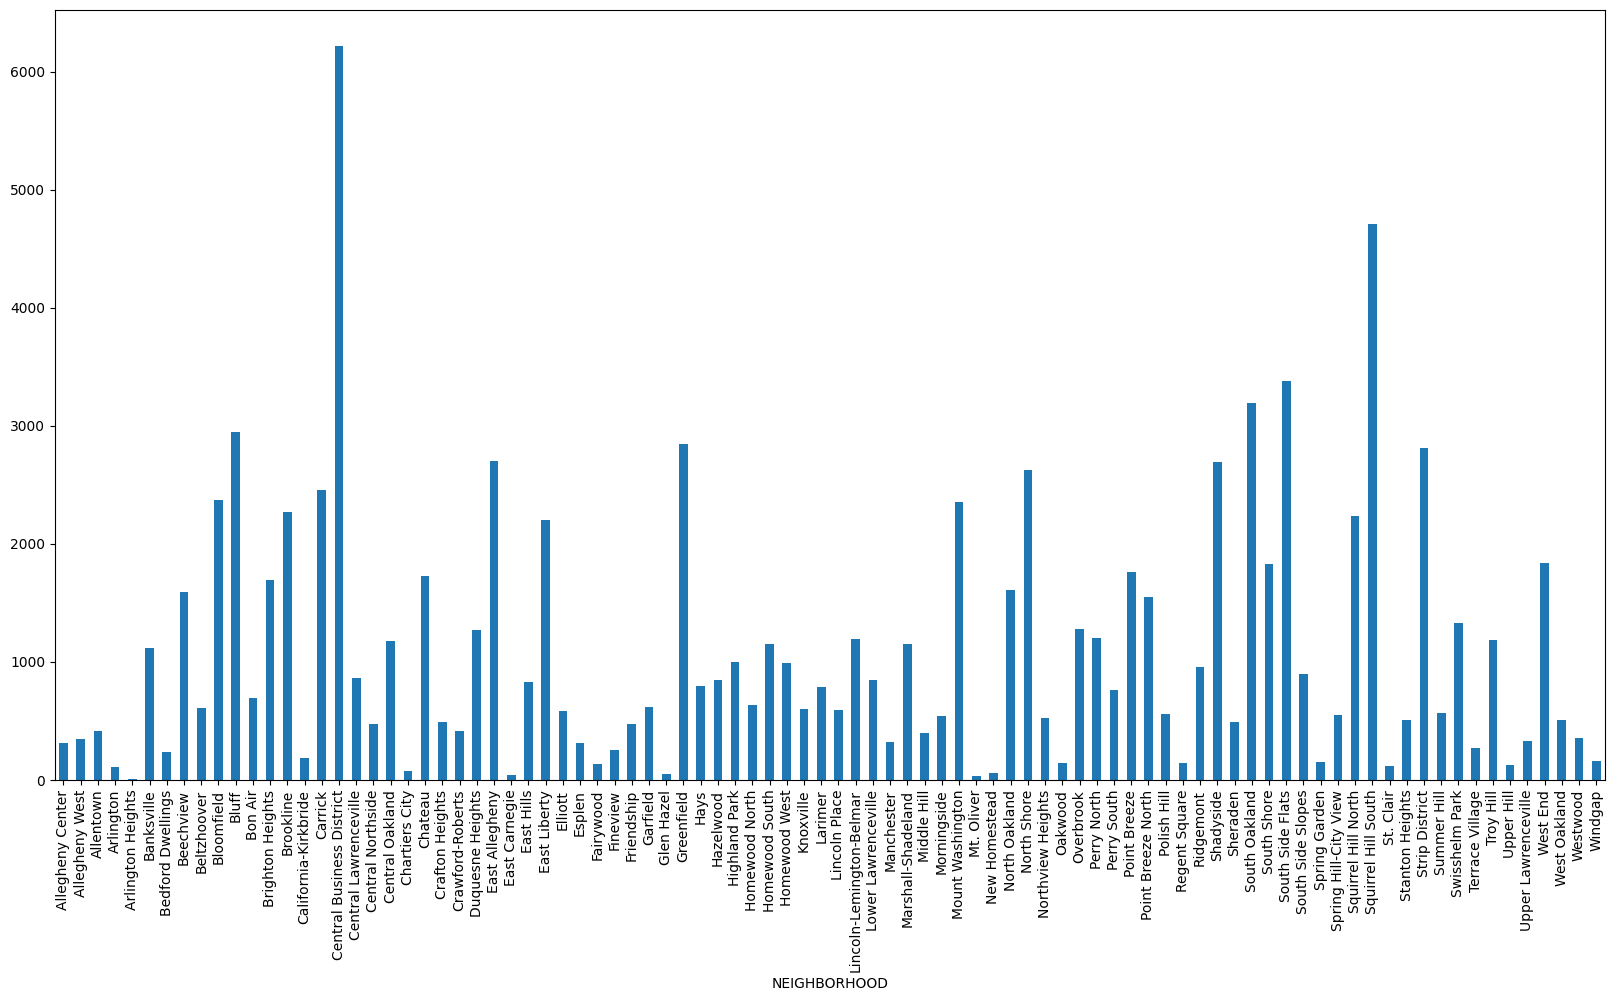

In [52]:
crashes = crashes.groupby("NEIGHBORHOOD").sum()
crashes["DANGER_SCORE"].plot.bar(figsize = (20,10))

Looks like the Central Business District and Squirrel Hill South are our biggest offenders. But lets map this all out.

<AxesSubplot: >

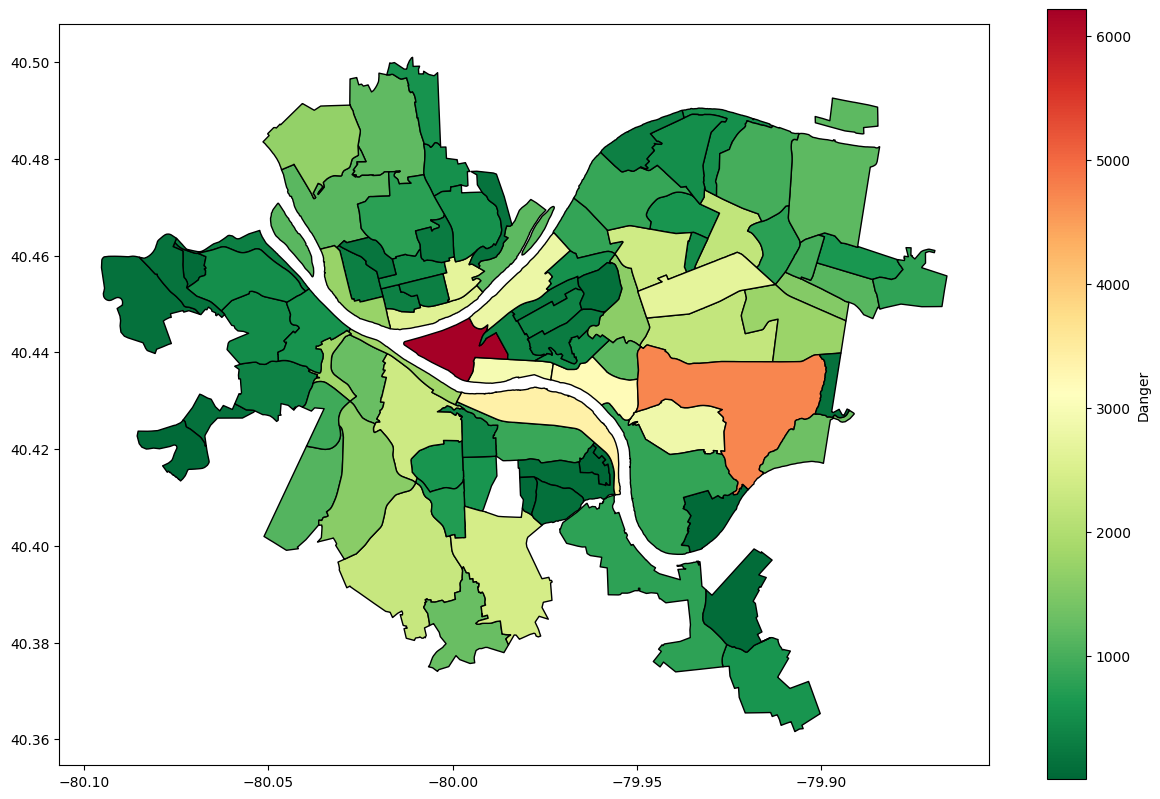

In [53]:
crash_map = neighborhoods.merge(crashes, how="left", left_on="hood", right_on="NEIGHBORHOOD")
crash_map.plot(column="DANGER_SCORE",
               cmap="RdYlGn_r",
               edgecolor="black",
               legend=True,
               legend_kwds={"label": "Danger"},
               figsize=(15, 10))

# Traffic Signage

The final bits of data we'll be looking at will cover traffic signage (https://data.wprdc.org/dataset/city-traffic-signs/resource/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c), and we'll specifically be looking at the amount of stop signs, pedestrian signs, and no turn on red signs are present in a neighborhood. Our reasoning is thus:

* Stop signs generally make intersections without traffic lights safer
* Pedestrian signs alert drivers that pedestrians may cross the road in an area, thus causing them to be more cautious, the opposite of what we want
* No turn on red signs prevent (discourage) drivers from making unpredictable, spur-of-the-moment decisions based on limited information, or in other words, they're no fun and detrimental to the **Real Life Frogger** experience.

So, let's get started with some more prep code:

In [54]:
the_signs = pd.read_csv("traffic-sign-data.csv")
the_signs = the_signs.iloc[:, [7, 8]]
the_signs = the_signs.dropna()
neighborhood_stopsigns = dict()
neighborhood_pedsigns = dict()
neighborhood_noturnsigns = dict()
hoodListStop = list(())
hoodListPed = list(())
hoodListNoTurn = list(())

And now that our lists, dictionaries, and datasets are ready to go, let's get some sorting done. The type of sign is elaborated on in the 'description' column, so we'll filter out all of the signs we don't want using some basic conditionals that will also prep our lists and dictionaries for later use.

In [55]:
for index, row in the_signs.iterrows():
    neighborhood = row['neighborhood']
    signage = row['description']
    if signage == 'Stop':
        if neighborhood not in neighborhood_stopsigns:
            neighborhood_stopsigns[neighborhood] = 1
            
        else:
            neighborhood_stopsigns[neighborhood] += 1
            
        if neighborhood not in hoodListStop:
            hoodListStop.append(neighborhood)
            
        else:
            continue
            
    elif signage == 'Pedestrian':
        if neighborhood not in neighborhood_pedsigns:
            neighborhood_pedsigns[neighborhood] = 1
            
        else:
            neighborhood_pedsigns[neighborhood] += 1
            
        if neighborhood not in hoodListPed:
            hoodListPed.append(neighborhood)
            
        else:
            continue
         
    elif signage == 'No Turn on Red':
        if neighborhood not in neighborhood_noturnsigns:
            neighborhood_noturnsigns[neighborhood] = 1
            
        else:
            neighborhood_noturnsigns[neighborhood] += 1
            
        if neighborhood not in hoodListNoTurn:
            hoodListNoTurn.append(neighborhood)
            
        else:
            continue
        
            
    else:
        continue
stop_sign_counts = neighborhood_stopsigns.values()
stop_sign_counts = list(stop_sign_counts)
ped_sign_counts = neighborhood_pedsigns.values()
ped_sign_counts = list(ped_sign_counts)
noturn_sign_counts = neighborhood_noturnsigns.values()
noturn_sign_counts = list(noturn_sign_counts)

So, after some more list/dictionary torture, we're set to make some *Graphs!* First, stop sign prevalance:

Mount Oliver Borough     1
Arlington Heights        4
South Shore              5
St. Clair                6
Allegheny Center         8
Glen Hazel               9
Ridgemont               10
New Homestead           12
Chartiers City          15
West End                16
Bedford Dwellings       17
Hays                    17
Allegheny West          19
Northview Heights       19
Oakwood                 20
Mt. Oliver              22
Esplen                  26
Fairywood               26
East Carnegie           31
Bon Air                 32
Friendship              33
North Shore             34
West Oakland            35
Spring Garden           36
Swisshelm Park          36
dtype: int64

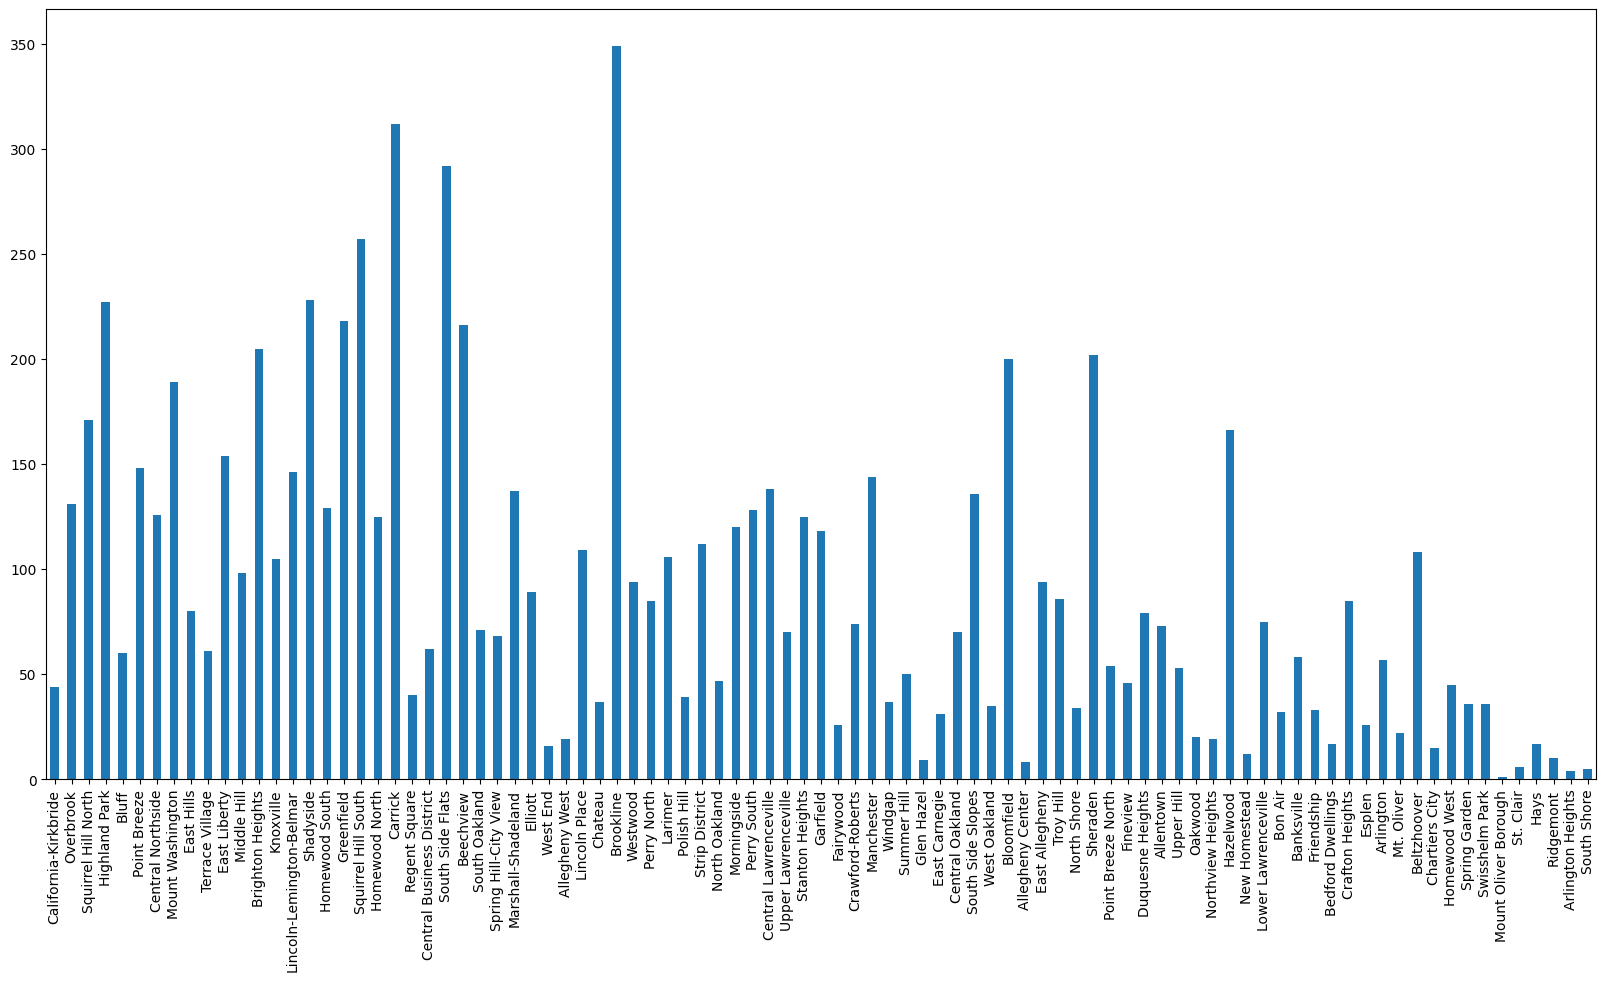

In [56]:
stopdf = pd.Series(stop_sign_counts, index=hoodListStop)
stopdf.plot(kind="bar", figsize=(20,10))
stopdf.sort_values().head(25)

Then pedestrian signs...

Mount Oliver Borough     1
Fineview                 1
Chartiers City           1
St. Clair                1
Knoxville                1
East Carnegie            2
East Hills               2
Northview Heights        2
Esplen                   2
Point Breeze North       2
Arlington                2
Lincoln Place            2
Windgap                  2
Overbrook                3
Hays                     3
Bedford Dwellings        3
Homewood North           3
West End                 3
Spring Garden            4
Manchester               4
Upper Hill               4
Marshall-Shadeland       5
Spring Hill-City View    5
Allegheny West           5
Stanton Heights          5
dtype: int64

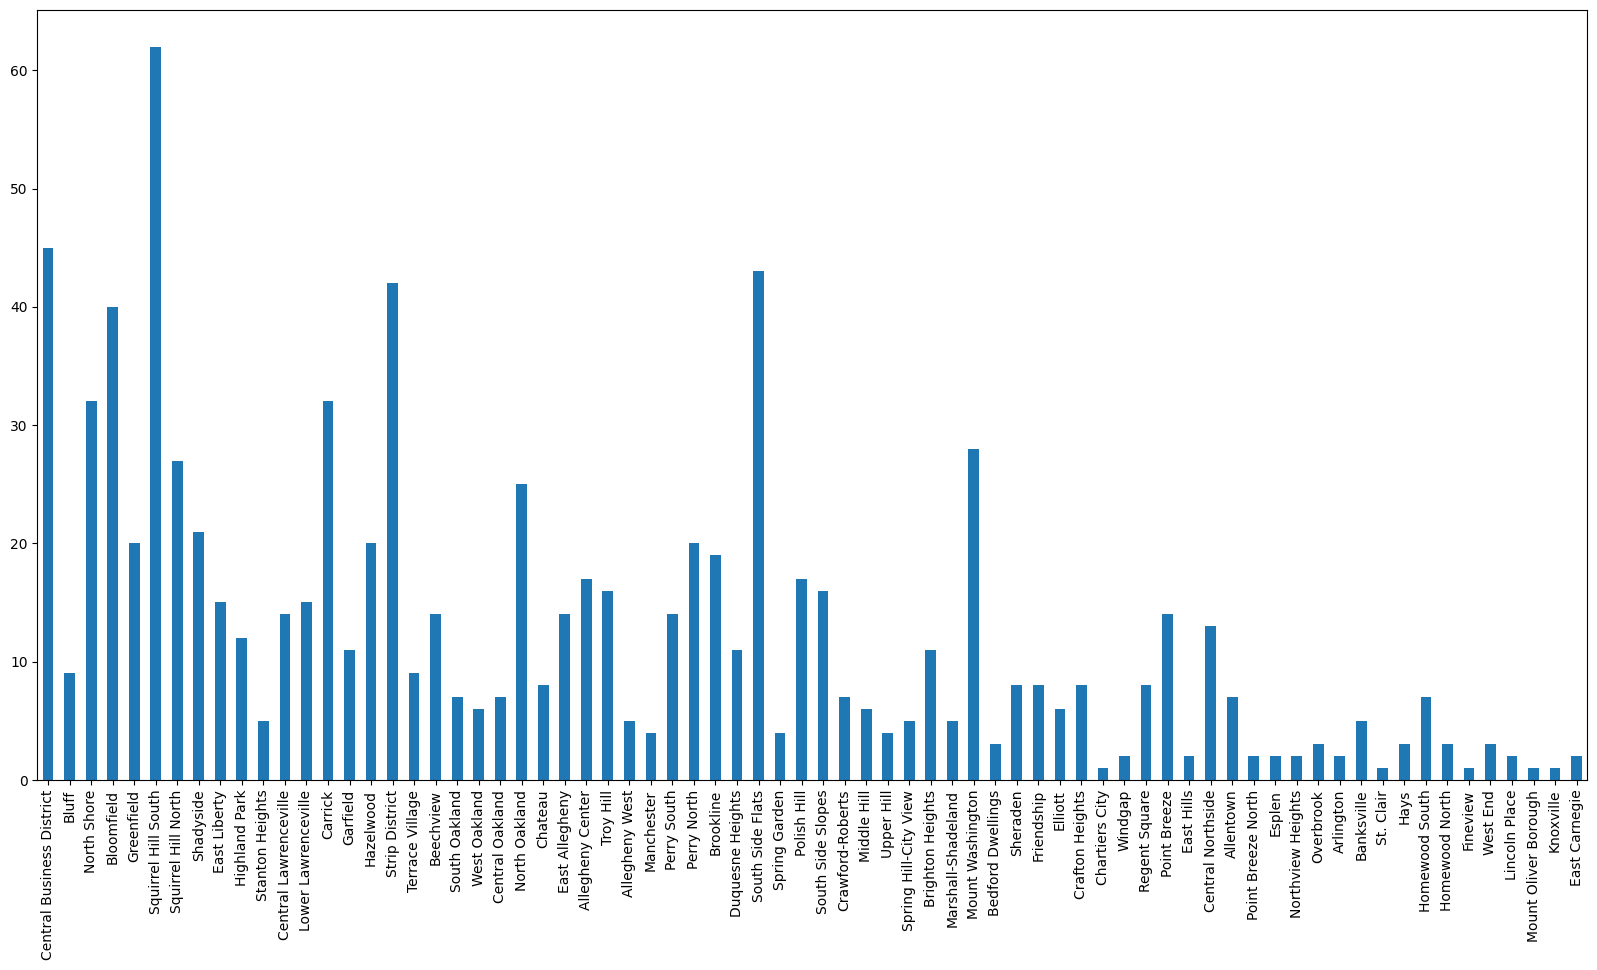

In [57]:
peddf = pd.Series(ped_sign_counts, index=hoodListPed)
peddf.plot(kind="bar", figsize=(20,10))
peddf.sort_values().head(25)

And finally, no turn on red signs.

Esplen                      1
Bon Air                     1
Regent Square               1
California-Kirkbride        1
Hays                        1
Lincoln Place               1
Beltzhoover                 1
Duquesne Heights            1
Summer Hill                 1
Northview Heights           1
Allegheny West              1
Crafton Heights             1
Manchester                  1
Lincoln-Lemington-Belmar    2
Terrace Village             2
New Homestead               2
Mount Oliver Borough        2
West End                    2
Morningside                 2
Homewood West               2
Sheraden                    2
Knoxville                   2
Westwood                    2
Friendship                  4
Troy Hill                   5
dtype: int64

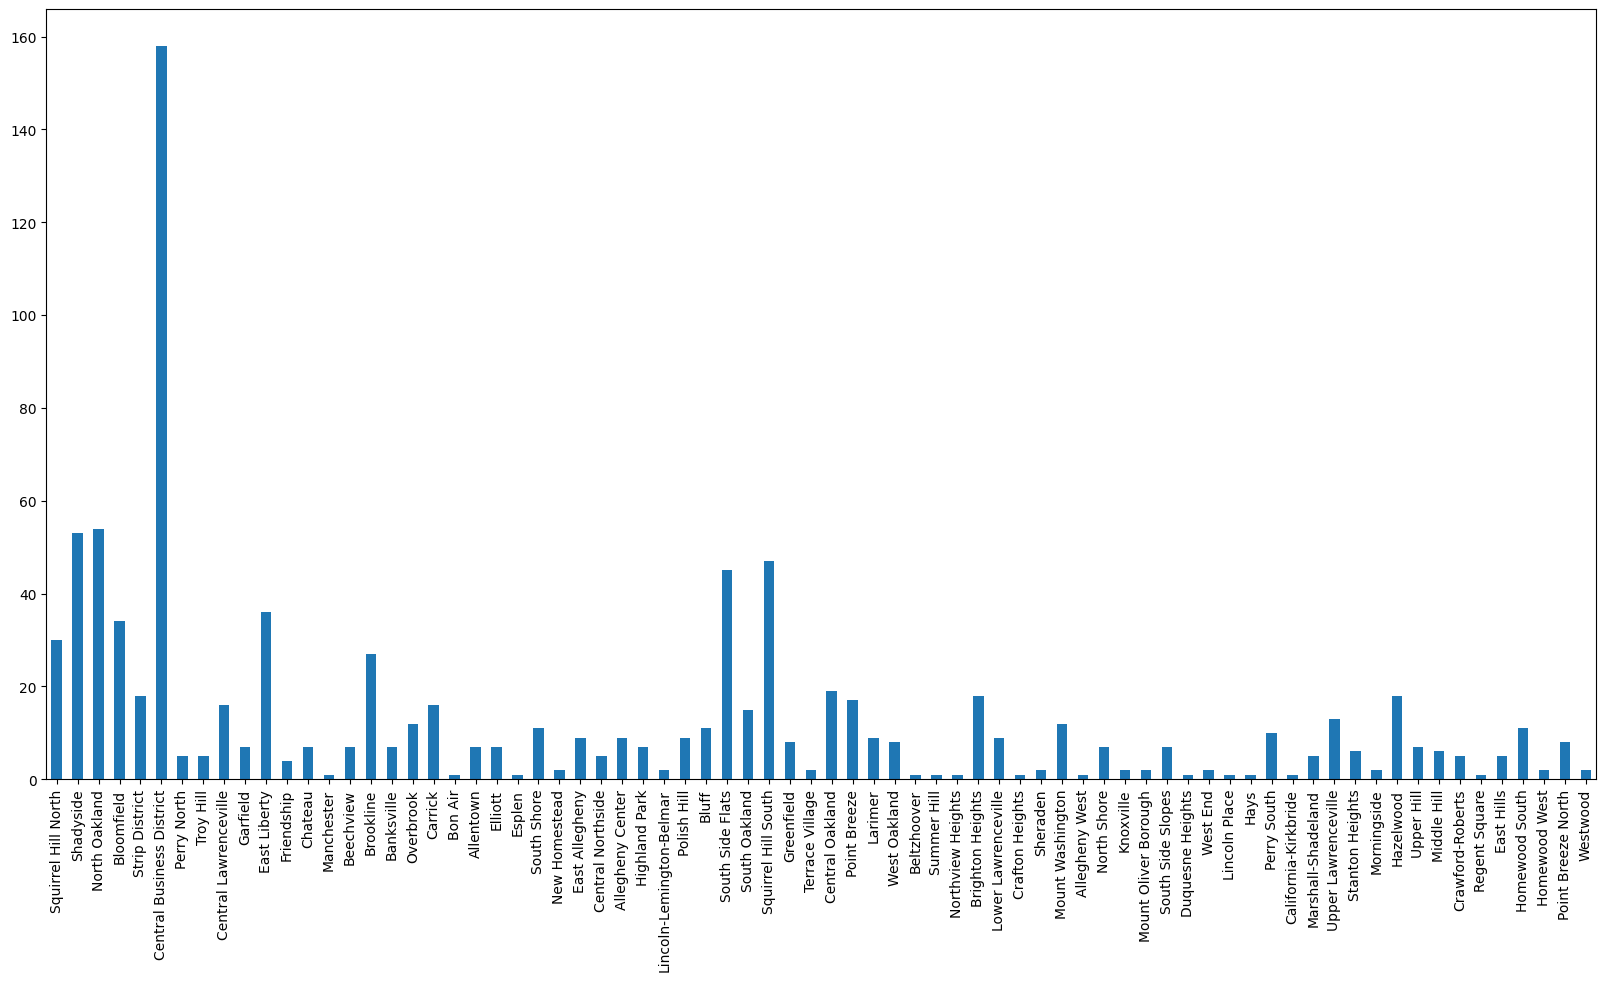

In [58]:
noturndf = pd.Series(noturn_sign_counts, index=hoodListNoTurn)
noturndf.plot(kind="bar", figsize=(20,10))
noturndf.sort_values().head(25)

Looks great, right?

WRONG
=====

This data doen't account for the size of each neighborhood! So of course smaller neighborhoods, with less room and less need for traffic signage, are going to come out on top by default! So, it's time to use that surprise tool I mentioned earlier: A dictionary with the area in square miles of all 90 neighborhoods in Pittsburgh *that I had to fill out manually because I could only find a pdf with the info I needed! __HOORAY!__*

So, first we redo stop signs by *actually using Pandas properly* (somewhat) to set up a dataframe with neighborhoods, sign counts, and areas. we reset the index to make the neighborhood names manipulatable, drop duplicates to double-check everything is set up correctly, use a conditional in the for-loop to *triple-check* everything is set up correctly, and make three...

Hays                           9.826590
New Homestead                 15.189873
St. Clair                     19.354839
Glen Hazel                    19.565217
South Shore                   22.727273
Fairywood                     26.804124
Ridgemont                     27.777778
Arlington Heights             36.363636
Allegheny Center              38.095238
Banksville                    59.793814
Northview Heights             61.290323
Perry North                   68.548387
East Carnegie                 72.093023
Swisshelm Park                76.595745
West End                      80.000000
Oakwood                       80.000000
Windgap                       88.095238
North Oakland                 94.000000
Bedford Dwellings             94.444444
Central Business District     95.384615
Squirrel Hill South           95.895522
Chateau                       97.368421
Bon Air                      100.000000
Hazelwood                    104.402516
Lincoln Place                111.224490


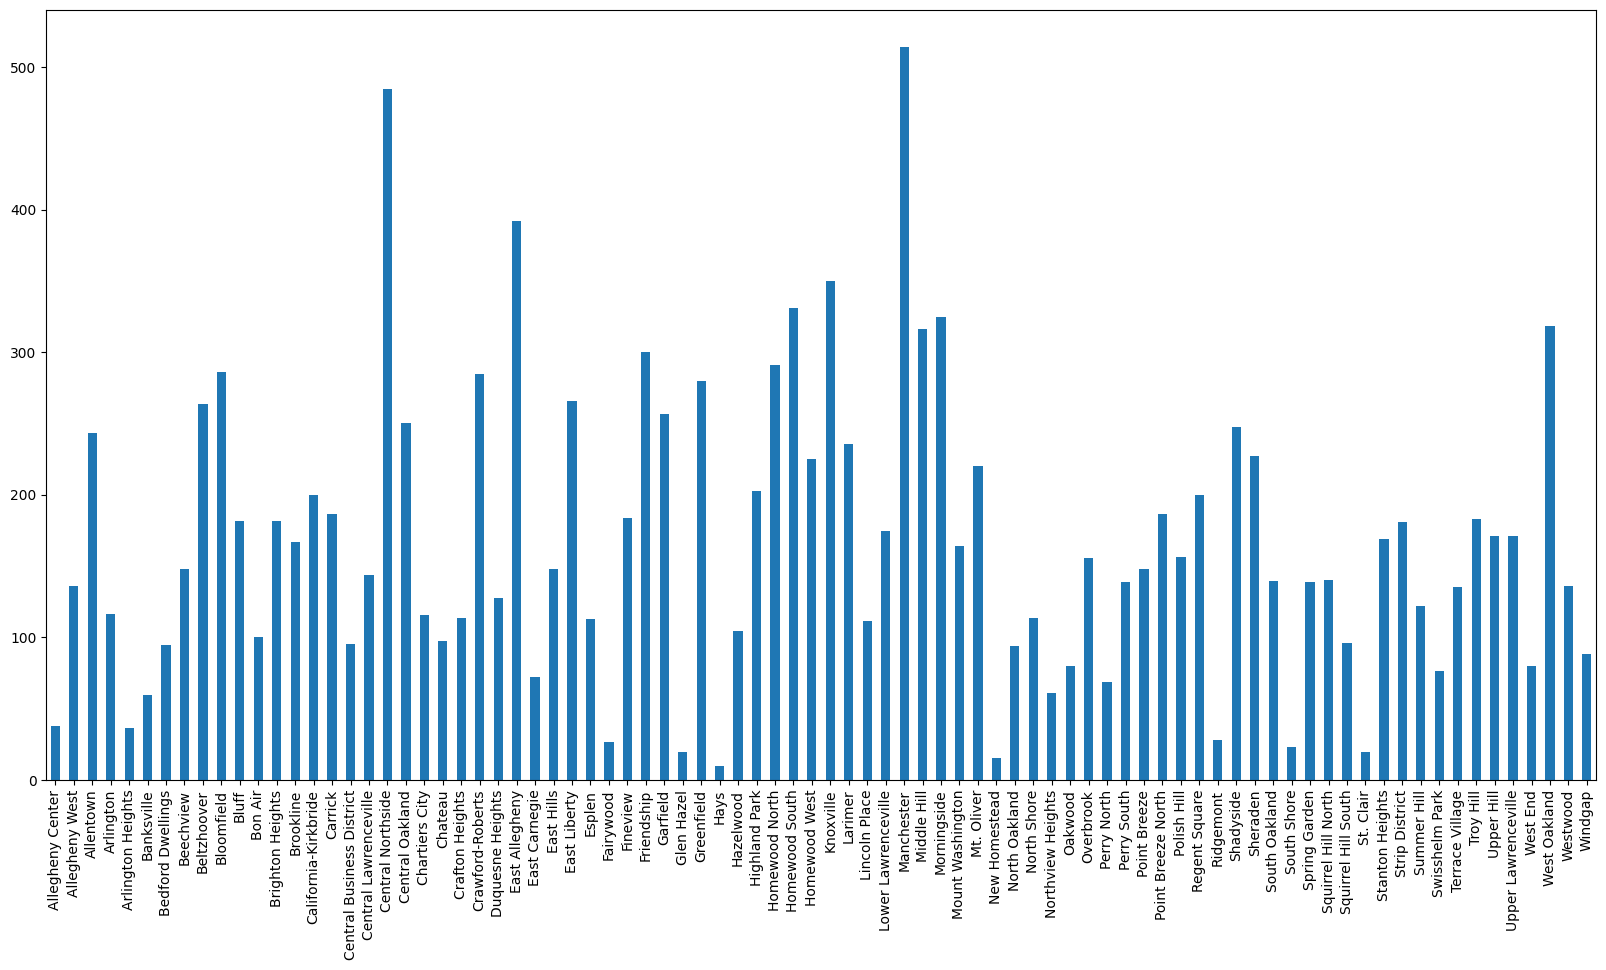

In [59]:
stop_signs = pd.Series(neighborhood_stopsigns)
stop_signs_area_dict = {'Stop Signs': stop_signs, 'Square Miles': neighborhood_area}
stop_signs_area = pd.DataFrame(stop_signs_area_dict)
stop_signs_area = stop_signs_area.reset_index()
stop_signs_area = stop_signs_area.drop_duplicates()
stop_signs_by_area = list(())
for index, row in stop_signs_area.iterrows():
    area = row['Square Miles']
    signs = row['Stop Signs']
    neighborhood = row['index']
    if neighborhood in neighborhood_area_keys:
        area_accounted = signs / area
        stop_signs_by_area.append(area_accounted)
        
    else:
        continue
    
stopdf = pd.Series(stop_signs_by_area, index=neighborhood_area_keys)
stopdf = stopdf.dropna()
stopdf.plot(kind="bar", figsize=(20,10))
stopdf.sort_values().head(25)

more...

Hays                   1.734104
Lincoln Place          2.040816
St. Clair              3.225806
Knoxville              3.333333
Overbrook              3.571429
East Hills             3.703704
Fineview               4.000000
Arlington              4.081633
East Carnegie          4.651163
Windgap                4.761905
Banksville             5.154639
Northview Heights      6.451613
Stanton Heights        6.756757
Point Breeze North     6.896552
Homewood North         6.976744
Chartiers City         7.692308
Esplen                 8.695652
Sheraden               8.988764
Brookline              9.090909
Beechview              9.589041
Brighton Heights       9.734513
Crafton Heights       10.666667
Highland Park         10.714286
Hazelwood             12.578616
Upper Hill            12.903226
dtype: float64

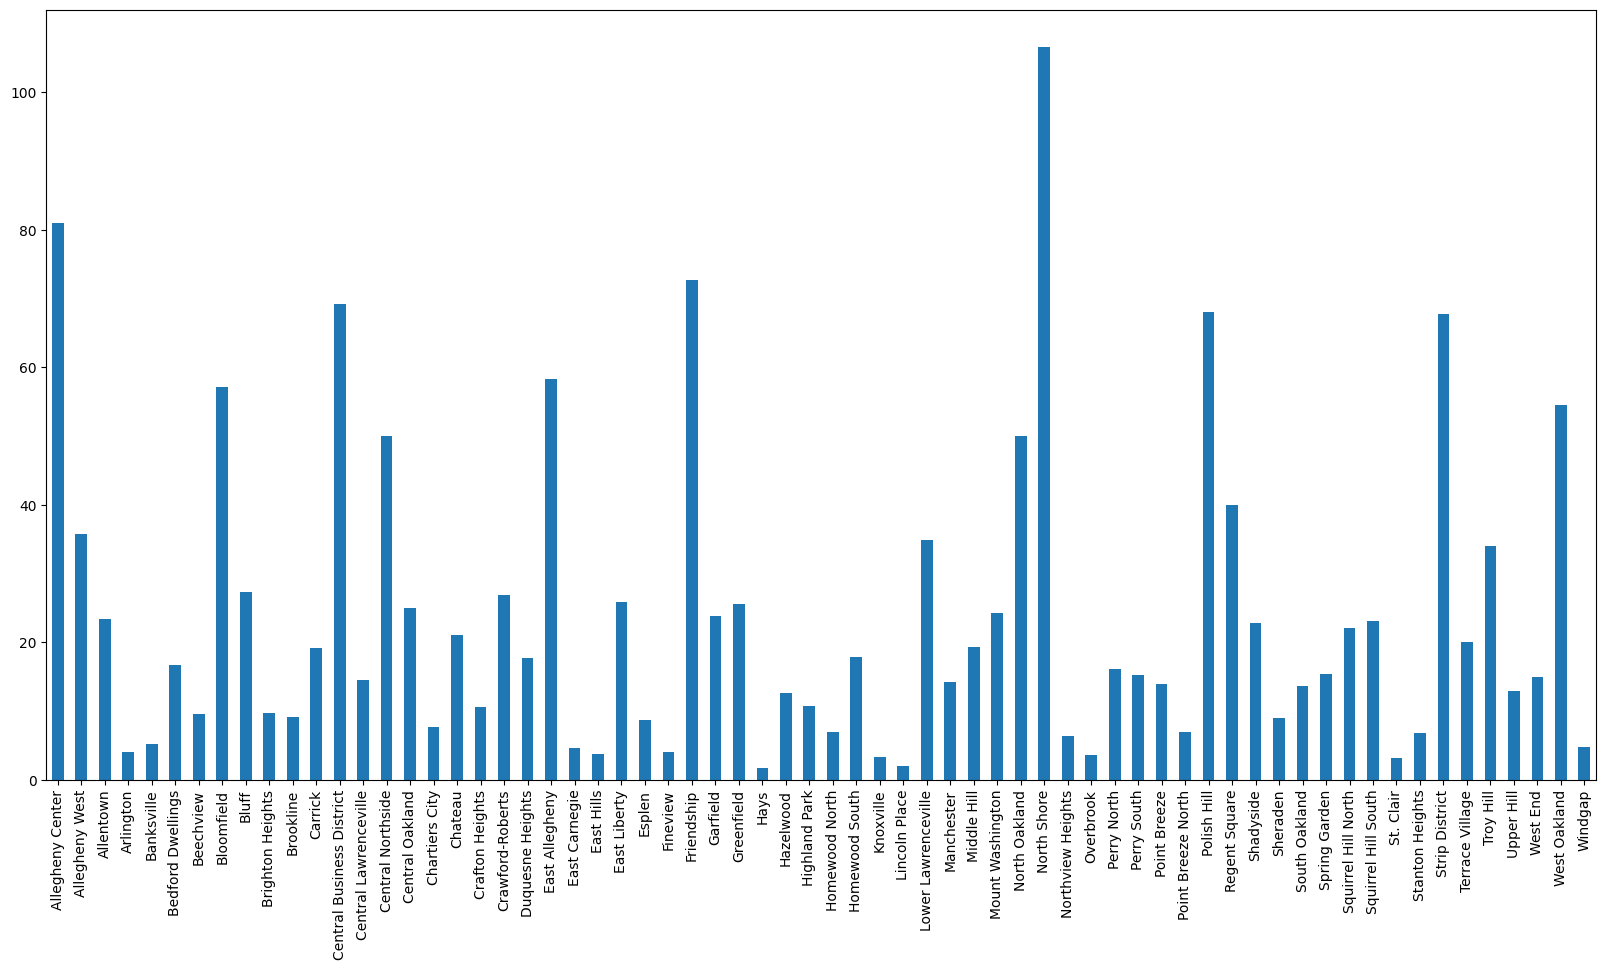

In [60]:
ped_signs = pd.Series(neighborhood_pedsigns)
ped_signs_area_dict = {'Pedestrian Signs': ped_signs, 'Square Miles': neighborhood_area}
ped_signs_area = pd.DataFrame(ped_signs_area_dict)
ped_signs_area = ped_signs_area.reset_index()
ped_signs_area = ped_signs_area.drop_duplicates()
ped_signs_by_area = list(())
for index, row in ped_signs_area.iterrows():
    area = row['Square Miles']
    signs = row['Pedestrian Signs']
    neighborhood = row['index']
    if neighborhood in neighborhood_area_keys:
        area_accounted = signs / area
        ped_signs_by_area.append(area_accounted)
        
    else:
        continue
    
peddf = pd.Series(ped_signs_by_area, index=neighborhood_area_keys)
peddf = peddf.dropna()
peddf.plot(kind="bar", figsize=(20,10))
peddf.sort_values().head(25)

graphs...

Hays                    0.578035
Lincoln Place           1.020408
Crafton Heights         1.333333
Duquesne Heights        1.612903
Sheraden                2.247191
Summer Hill             2.439024
Beltzhoover             2.439024
New Homestead           2.531646
Westwood                2.898551
Bon Air                 3.125000
Northview Heights       3.225806
Manchester              3.571429
Perry North             4.032258
Esplen                  4.347826
Terrace Village         4.444444
California-Kirkbride    4.545455
Beechview               4.794521
Regent Square           5.000000
Morningside             5.405405
Highland Park           6.250000
Knoxville               6.666667
Allegheny West          7.142857
Banksville              7.216495
Stanton Heights         8.108108
East Hills              9.259259
dtype: float64

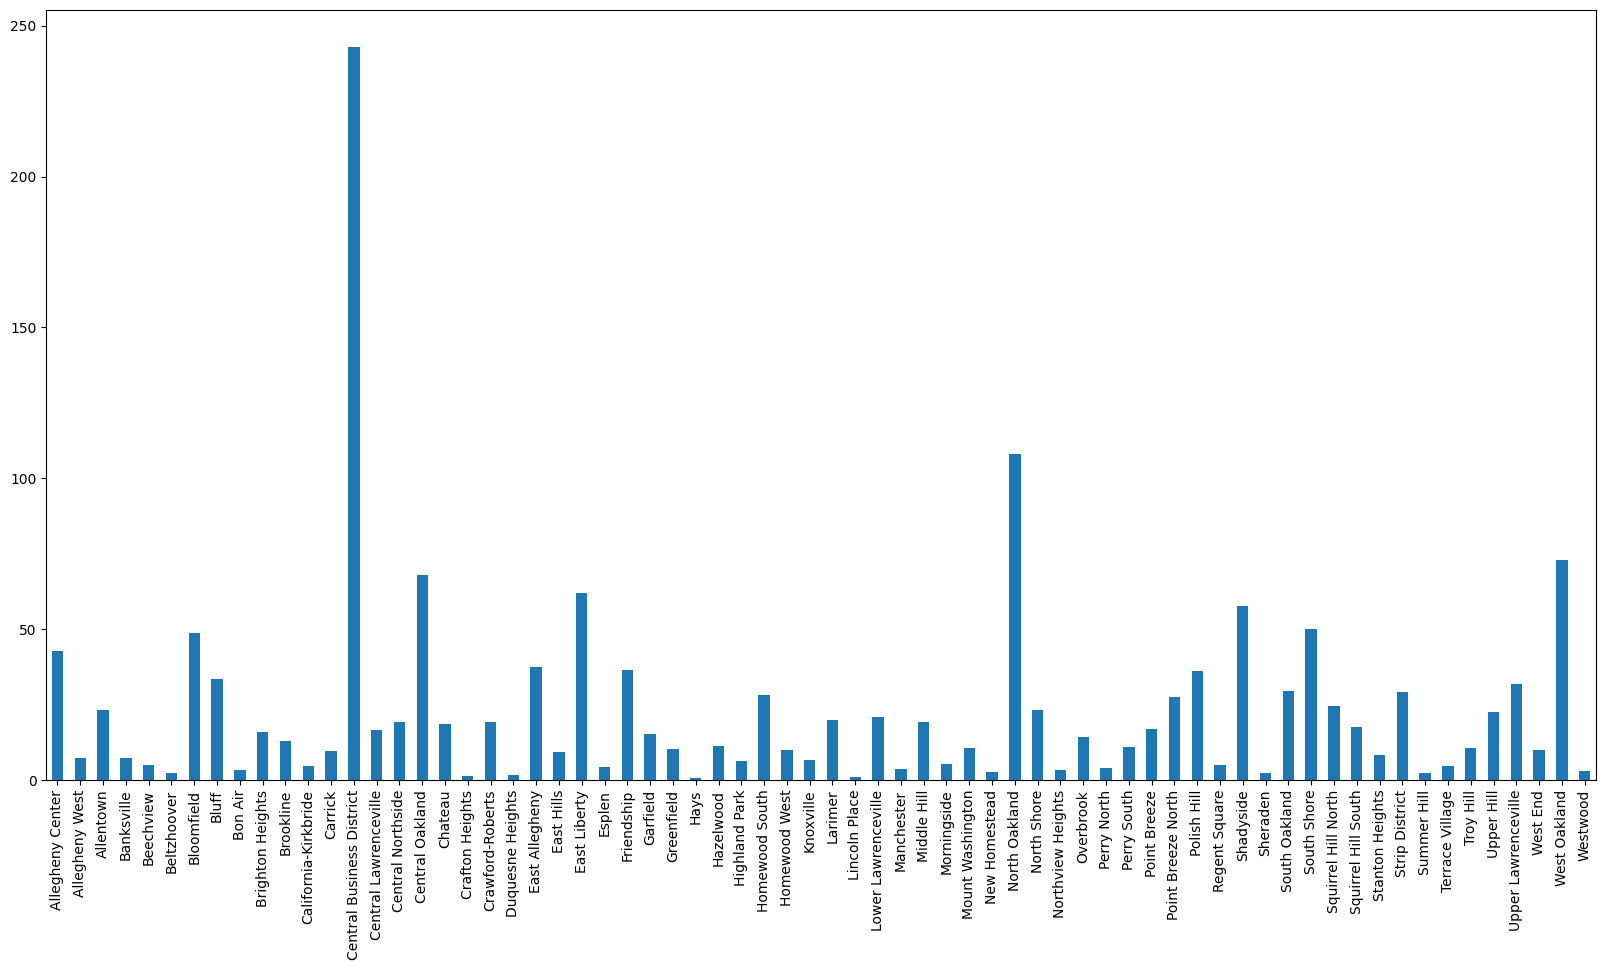

In [61]:
noturn_signs = pd.Series(neighborhood_noturnsigns)
noturn_signs_area_dict = {'No Turn Signs': noturn_signs, 'Square Miles': neighborhood_area}
noturn_signs_area = pd.DataFrame(noturn_signs_area_dict)
noturn_signs_area = noturn_signs_area.reset_index()
noturn_signs_area = noturn_signs_area.drop_duplicates()
noturn_signs_by_area = list(())
for index, row in noturn_signs_area.iterrows():
    area = row['Square Miles']
    signs = row['No Turn Signs']
    neighborhood = row['index']
    if neighborhood in neighborhood_area_keys:
        area_accounted = signs / area
        noturn_signs_by_area.append(area_accounted)
        
    else:
        continue
    
noturndf = pd.Series(noturn_signs_by_area, index=neighborhood_area_keys)
noturndf = noturndf.dropna()
noturndf.plot(kind="bar", figsize=(20,10))
noturndf.sort_values().head(25)

to get our area-accounted-for data. As an aside, just as proof that we aren't pulling numbers out of the glove compartment, take a look at the graph just above. The neighborhoods with the highest amount of 'no turn on red' signs per square mile are the Central Business District and most of Oakland. I'd say that tracks. Anyways, that means we have some new points to tally up. I decided to go with just the top 25 this time, because I don't think this sub-metric is as impactful as the others we worked with. Neighborhoods can have very little traffic signage, but that doesn't mean much if the cars are putzing along or there's no traffic density at all. That, and after manually going through and assigning points for the speed/traffic data section, my fingers hurt and I'd rather not do that many score-tallies a second time. So, our point totals for this section are as follows:

* Hays: 75
* Lincoln Place: 49
* St. Clair: 46
* Northview Heights: 45
* New Homestead: 42
* Banksville: 34
* East Carnegie: 30
* Sheraden: 29
* Crafton Heights: 27
* Knoxville: 27
* Perry North: 27 
* Windgap: 25
* Duquesne Heights: 22
* Glen Hazel: 22
* East Hills: 21
* Esplen: 21
* Overbrook: 21
* South Shore: 21
* Fairywood: 20
* Fineview: 20 
* Summer Hill: 20
* Beltzhoover: 19
* Bon Air: 19
* Ridgemont: 19
* Arlington: 18
* Arlington Heights: 18
* Allegheny Center: 17
* Westwood: 17
* Beechview: 15
* Stanton Heights: 15
* Manchester: 14
* Point Breeze North: 12
* Swisshelm Park: 12
* Homewood North: 11
* Terrace Village: 11
* West End: 11
* California-Kirkbride: 10 
* Chartiers City: 10
* Highland Park: 9
* Oakwood: 9
* Regent Square: 8
* Bedford Dwellings: 7
* Brookline: 7
* Morningside: 7
* North Oakland: 7 
* Central Business District: 6
* Brighton Heights: 5
* Squirrel Hill South: 5
* Allegheny West: 4
* Chateau: 4
* Hazelwood: 4
* Upper Hill: 1

And once again, a final tally dictionary, read-made into a series.

In [62]:
signage_final_scores = {'Hays': 75,
'Lincoln Place': 49,
'St. Clair': 46,
'Northview Heights': 45,
'New Homestead': 42,
'Banksville': 34,
'East Carnegie': 30,
'Sheraden': 29,
'Crafton Heights': 27,
'Knoxville': 27,
'Perry North': 27,
'Windgap': 25,
'Duquesne Heights': 22,
'Glen Hazel': 22,
'East Hills': 21,
'Esplen': 21,
'Overbrook': 21,
'South Shore': 21,
'Fairywood': 20,
'Fineview': 20,
'Summer Hill': 20,
'Beltzhoover': 19,
'Bon Air': 19,
'Ridgemont': 19,
'Arlington': 18,
'Arlington Heights': 18,
'Allegheny Center': 17,
'Westwood': 17,
'Beechview': 15,
'Stanton Heights': 15,
'Manchester': 14,
'Point Breeze North': 12,
'Swisshelm Park': 12,
'Homewood North': 11,
'Terrace Village': 11,
'West End': 11,
'California-Kirkbride': 10, 
'Chartiers City': 10,
'Highland Park': 9,
'Oakwood': 9,
'Regent Square': 8,
'Bedford Dwellings': 7,
'Brookline': 7,
'Morningside': 7,
'North Oakland': 7, 
'Central Business District': 6,
'Brighton Heights': 5,
'Squirrel Hill South': 5,
'Allegheny West': 4,
'Chateau': 4,
'Hazelwood': 4,
'Upper Hill': 1}
part_3_scores = pd.Series(signage_final_scores)
part_3_scores_corrected_dict = {'Part 3 Scores': part_1_scores, 'Square Miles': neighborhood_area}
part_3_scores_corrected = pd.DataFrame(part_3_scores_corrected_dict)
part_3_scores_corrected = part_3_scores_corrected.iloc[:, [0]]
part_3_scores_corrected = part_3_scores_corrected.fillna(0)
part_3_scores_corrected

Part 3 Scores
Allegheny Center              74.0
Allegheny West                 0.0
Allentown                      0.0
Arlington                     51.0
Arlington Heights              0.0
...                            ...
Upper Lawrenceville            0.0
West End                       0.0
West Oakland                  19.0
Westwood                     121.0
Windgap                       36.0

[90 rows x 1 columns]

# The Best Neighborhood (for playing Real Life Frogger):



So we got a lot of cool data. But how do we combine traffic volume, number of intoxicated psychopaths, and stop sign presence all into one difficulty ranking?

This is where *weights* come into play. Being frogger pros, we can objectively say that a neighborhood's difficulty is 40% traffic speed/volume, 40% driver danger rating, and 20% traffic signage. To normalize the different point systems we used, everything is based off of percentile, where the largest gets 1, and the rest get a percent based off of the maximum value.

In [98]:
#frogger = pd.DataFrame(columns=["NEIGHBORHOOD", "DANGER_SCORE", "TRAFFIC_SCORE", "SIGNAGE_SCORE", "DIFFICULTY_RATING"])
frogger = crashes
frogger = frogger.drop(columns=["IMPAIRED_SCORE","PSYCHOPATH_SCORE"])

traffic = part_1_scores.reset_index(level=0)
traffic.columns = ["NEIGHBORHOOD", "TRAFFIC_SCORE"]
frogger = frogger.merge(traffic, how="left", on="NEIGHBORHOOD")


signage = part_3_scores.reset_index(level=0)
signage.columns = ["NEIGHBORHOOD", "SIGNAGE_SCORE"]
frogger = frogger.merge(signage, how="left", on="NEIGHBORHOOD")

frogger = frogger.fillna(0)

# Weigh our scores equally based off of % of max
TRAFFIC_MAX = traffic["TRAFFIC_SCORE"].max()
DANGER_MAX = crashes["DANGER_SCORE"].max()
SIGNAGE_MAX = signage["SIGNAGE_SCORE"].max()

frogger["TRAFFIC_SCORE"] = frogger.apply(lambda row: (row.TRAFFIC_SCORE/TRAFFIC_MAX)*40, axis=1)
frogger["DANGER_SCORE"] = frogger.apply(lambda row: (row.DANGER_SCORE/DANGER_MAX)*40, axis=1)
frogger["SIGNAGE_SCORE"] = frogger.apply(lambda row: (row.SIGNAGE_SCORE/SIGNAGE_MAX)*20, axis=1)

# Sum scores
frogger["DIFFICULTY_RATING"] = frogger.apply(lambda row: row.TRAFFIC_SCORE + row.DANGER_SCORE + row.SIGNAGE_SCORE, axis=1)

difficulty_map = neighborhoods.merge(frogger, how="left", left_on="hood", right_on="NEIGHBORHOOD")

And now... for the final reveal!

           NEIGHBORHOOD  DANGER_SCORE  TRAFFIC_SCORE  SIGNAGE_SCORE  \
56          North Shore     16.878017      34.899329       0.000000   
22      Crafton Heights      3.147731      40.000000       7.200000   
76  Squirrel Hill South     30.331509      17.986577       1.333333   
63   Point Breeze North      9.977470      35.704698       3.200000   
79       Strip District     18.088188      29.798658       0.000000   

    DIFFICULTY_RATING  
56          51.777346  
22          50.347731  
76          49.651420  
63          48.882168  
79          47.886846  
AxesSubplot(0.125,0.11;0.775x0.77)


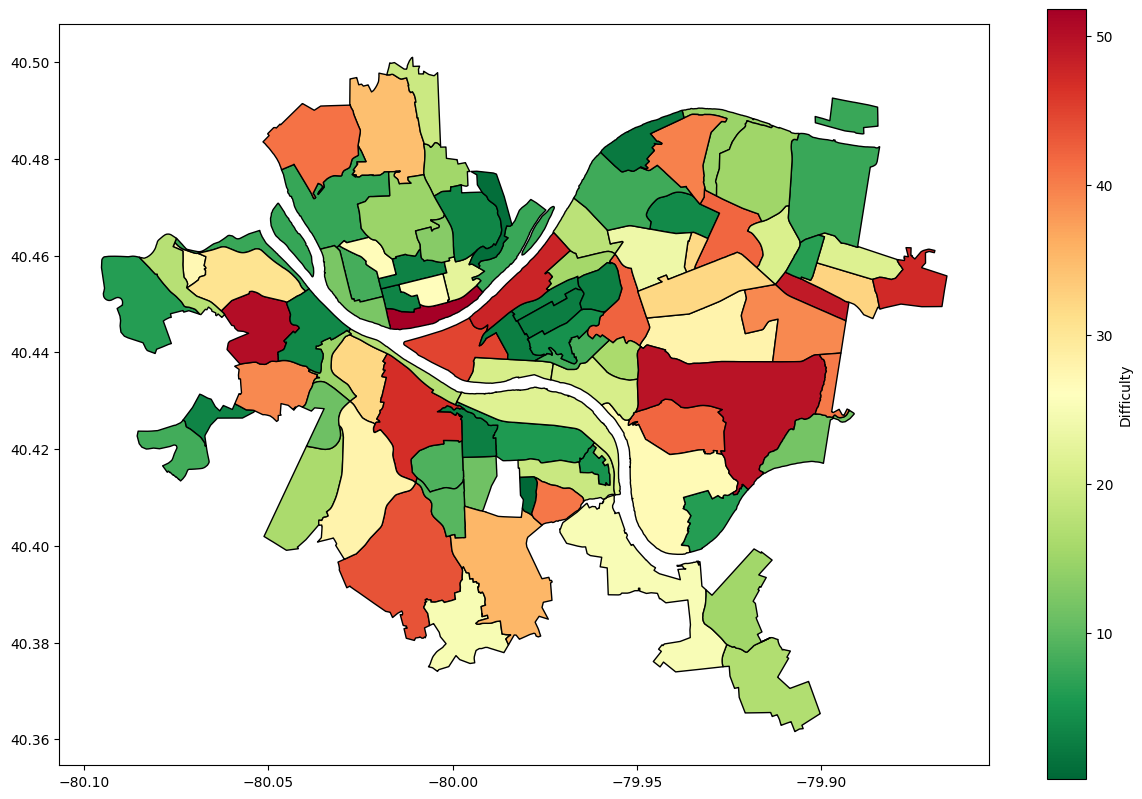

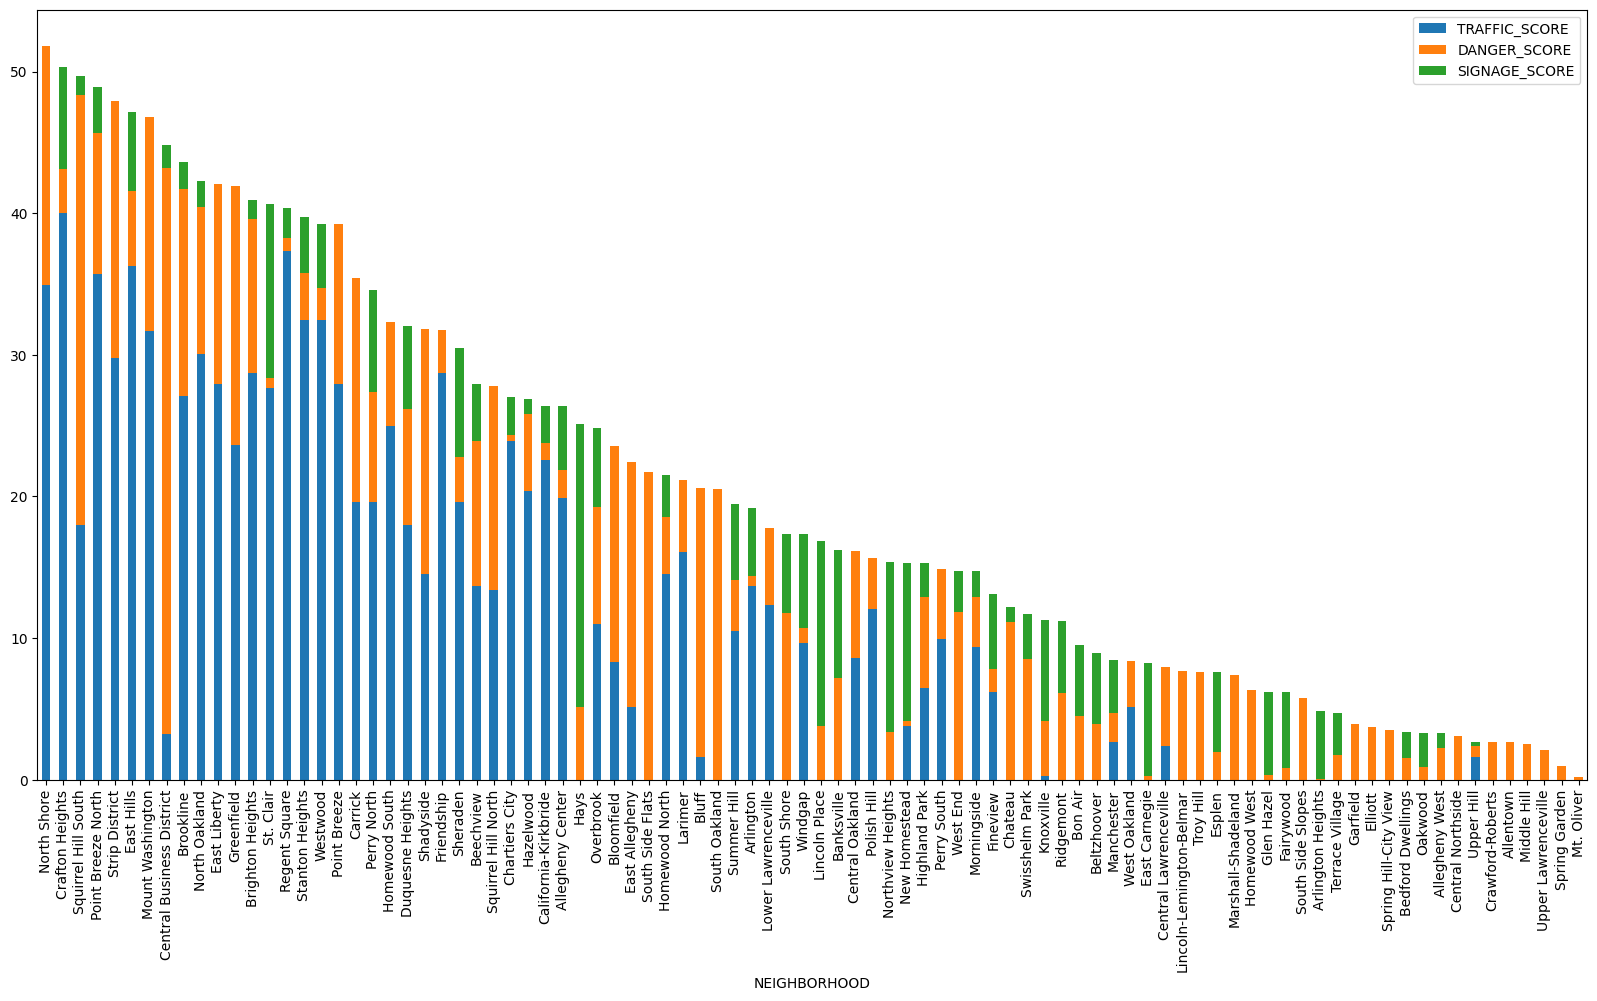

In [111]:
difficulty_map.plot(column="DIFFICULTY_RATING",
               cmap="RdYlGn_r",
               edgecolor="black",
               legend=True,
               legend_kwds={"label": "Difficulty"},
               figsize=(15, 10))

print(frogger.sort_values("DIFFICULTY_RATING", ascending=False).nlargest(5, "DIFFICULTY_RATING"))
print(frogger.sort_values("DIFFICULTY_RATING", ascending=False).plot(kind="bar",
                                                                     stacked=True,
                                                                     figsize=(20,10),
                                                                     x="NEIGHBORHOOD",
                                                                     y=["TRAFFIC_SCORE","DANGER_SCORE","SIGNAGE_SCORE"]))

# Conclusion:
## The Hardest: North Shore
![Best Neighborhood](img/north_shore.png)

## The Easiest: Mt. Oliver
![Worst Neighborhood](img/mt_oliver.png)

**Aidan:** After working with the traffic/speed and signage data sets, I was betting on Crafton Heights to come out on top, but 2nd place isn’t too bad. And in hindsight, I think it would be kinda hard to beat the North Shore, which hosts most of Pittsburgh’s sporting events and major concerts, in most of the categories we used for scoring. All in all, however, the trends seen in our final map are roughly what I expected going into this: most inner-city neighborhoods would be more dangerous due to various factors like population/commercial/recreational density and all that entails, while the outlying neighborhoods would be safer in general. I was initially surprised at how safe most of Oakland was rated, but it does make sense given the general vibe of the area, and it’s corroborated by the ‘no turn on red’ sign data I put together in part 3. Oakland has been intentionally made safer, due to its presence as Pittsburgh’s cultural/academic district. Though I will say I expected the Strip District to be higher up on the list.


**Aaron:** Wow, I can't wait to jump in front of a car!